

# <center><font color=darkblue>**Big Data Computing Project 2020-2021**<font></center>
## <center><font color=darkblue> **Mobile Health Human Behavior Analysis**<font></center>
### <center><font color=darkblue>**Human activity classification**<font></center>
##### <center><font color=darkblue>**Mahsa Barghi Mehmandari**<font></center>
##### <center><font color=darkblue>**1959831**<font></center>

# <font color=LightSeaGreen> **Contents of this notbook**</font>

---
*   [1. Introduction](#intro)
  -   [Task Summary](#ts.summary)
  -   [Dataset Summary](#ds.summary)
  -   [Activity Set](#activity)
  -   [Source](#source)

*   [2. PySpark Configuration on the Google Colab](#config)
  -   [Java Installation](#java)
  -   [Spark Installation](#spark)
  -   [Bulding a new spark session](#session)
*   [3. Load the Dataset](#load)
*   [4. Dataset Explanation](#explain)
  -   [Shape of the dataset](#shape)
  -   [ Print the schema of dataset ](#schema)
  -   [Dataset shape and schema summary ](#summary)
  -   [Cast "Activity" type to "double"](#cast)
  -   [Display first 5 rows of the dataset](#display5row)
*   [5. Dataset Exploration](#Dexplore)
  -   [Check for missing values](#missval)
  -   [Chek for outliers ](#out)
  -   [Check for Duplicates](#duplicate)
  -   [Summary of descriptive statics ](#stat)
  -   [Check for Correlation between features](#correlation)
  -   [Check for balancing](#balance)
  -   [Distributin plots](#dist)
  -   [Summary of Data Exploration section](#sum)
*   [6. Feature Engineering](#engineer)
  -   [Target column Balancing](#balancement)
           - [Undersampling](#undersample)
  -   [Define a winsorizing function](#winfunc)
   -   [Summary of the Feature Engineering section](#featuresum)
      
*   [7.Model training and Evaluation without considering outliers](#pipeline)     
  -   [Dataset Splitting: Training vs. Test Set](#split)
  -   [Working on various Learning Algorithms](#algorithms)
           - [Decision tree](#dt)
              - [Working on trainset only](#trainset)
              - [Check for generalization of the best model using test set](#dtgeneral)
              - [Feature importance](#featureimp)
              - [Summary of Decision Tree](#dtsummary)
           - [Random Forest](#rf)
              - [working  on train set only](#rftrainset)
              - [Check for generalization of the best model using test set](#rfgeneral)
              - [Feature importance](#rffeatureimp)
              - [Summary of Random Forest](#rfsummary)

      - [Multilayer Perceptron](#mlp)
          - [working  on trainset only](#mlptrainset)

              -[Train models without a scaler](#mlpnoscaler)
              - [Check for generalization of the best model using test set](#mlpwgeneral)

            -[Train models with a scaler](#mlpscaler)
              - [Check for generalization of the best model using test set](#mlpgeneral)
          - [Summary of Multilayer Perceptron](#mlpsummary)
               
*    [8. Model training and Evaluation with winsorized outliers](#pipelinewinso)
  -    [Check for outliers in the balanced datset](#outwinso)
           - [Winsorising](#winsorization)

    - [Decision tree](#dt)
          - [Check for generalization of the best model using test set](#dtwgeneral)
  
  - [Random Forest](#rfw)
          - [Check for generalization of the best model using test set](#rfwgeneral)

    - [Multilayer perceptron](#mlpw)
          - [Check for generalization of the best model using test set](#mlpwingeneral)
    - [Summary of applying winsorization](#winsum)

*    [9. Conclusion](#con)

# <font color=LightSeaGreen>**1. Introduction**<font><a name="intro"></a>
---
In this part, a Summary of the task and the dataset will be given.



#<font color=darkblue>**Task Summary**<font><a name="ts.summary"></a>
The MHEALTH (Mobile HEALTH) dataset comprises body motion and vital signs recordings for ten volunteers of the diverse profiles while performing several physical activities. Sensors placed on the subject's chest, right wrist, and left ankle are used to measure the motion experienced by diverse body parts, namely, acceleration, rate of turn, and magnetic field orientation. The sensor positioned on the chest also provides 2-lead ECG measurements, which can be potentially used for basic heart monitoring, checking for various arrhythmias, or looking at the effects of exercise on the ECG. In this project, only acceleration and gyroscope data will be used for the classification of the given activity.





#<font color=darkblue>**Dataset Summary**<font><a name="ds.summary"></a>

*   Number of **Activities**: 12
*   Number of **Sensor devices**: 3
*   Number of **Instances**: 10



#<font color=darkblue>**Activity Set**<font><a name="activity"></a>
The activity set is listed as follow:

L1: Standing still (1 min)<br>
L2: Sitting and relaxing (1 min)<br>
L3: Lying down (1 min)<br>
L4: Walking (1 min)<br>
L5: Climbing stairs (1 min)<br>
L6: Waist bends forward (20x)<br>
L7: Frontal elevation of arms (20x)<br>
L8: Knees bending (crouching) (20x)<br>
L9: Cycling (1 min)<br>
L10: Jogging (1 min)<br>
L11: Running (1 min)<br>
L12: Jump front & back (20x)<br><br>
**NOTE:** In brackets are the number of repetitions (Nx) or the duration of the exercises (min).

## <font color=darkblue>**Source**<font><a name="source"></a>
The dataset is publicly available on the Kaggle website. You can find it below the link:<br>
[Link to dataset](https://www.kaggle.com/gaurav2022/mobile-health)

---

#<font color=LightSeaGreen>**2. PySpark Configuration on the Google Colab**<font><a name="config"></a>
The written codes for this part are inspired by some other sources. One of them is:<br> 
[link](https://www.analyticsvidhya.com/blog/2020/11/a-must-read-guide-on-how-to-work-with-pyspark-on-google-colab-for-data-scientists/)

In [ ]:
#This piece of code is written to avoid some warning that I got during plotting features' distributions
import warnings
warnings.filterwarnings('ignore')

##<font color=darkBlue>**Java Installation**<font><a name="java"></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

##<font color=darkBlue>**Spark Installation**<font><a name="spark"></a>

In [ ]:
from bs4 import BeautifulSoup
import requests
url = 'https://downloads.apache.org/spark/' 
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)

In [ ]:
link_files = []
for link in soup.find_all('a'):
  link_files.append(link.get('href'))
spark_link = [x for x in link_files if 'spark' in x]  
print(spark_link)

['spark-2.4.8/', 'spark-3.0.3/', 'spark-3.1.2/', 'spark-3.2.0/']


In [ ]:
ver_spark = spark_link[1][:-1]
print(ver_spark)

spark-3.0.3


In [ ]:
import os 
os.system(f"wget -q https://www-us.apache.org/dist/spark/{ver_spark}/{ver_spark}-bin-hadoop2.7.tgz")
os.system(f"tar xf {ver_spark}-bin-hadoop2.7.tgz")
!pip install -q pyspark==3.0.3

     |████████████████████████████████| 209.1 MB 57 kB/s 
     |████████████████████████████████| 198 kB 52.7 MB/s 


In [ ]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{ver_spark}-bin-hadoop2.7"

##<font color=darkblue>**Building a new spark session**<font><a name="session"></a>

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test_spark").master("local[*]").getOrCreate()
spark

FileNotFoundError: ignored

# <font color=lightseagreen>**3. Load the Dataset**<font><a name="load"></a>
---
I am going to download the dataset from dropbox and create a Spark DataFrame.

In [ ]:
import os
os.system(
    "wget -q https://www.dropbox.com/s/oufke7d414m40p8/data.csv"
    )

if os.path.exists('dataset') is False:
    !mkdir dataset
!mv data.csv dataset 

In [ ]:
os.system(
    "wget -q https://www.dropbox.com/s/vcmkjl5qw0d3hz1/mhealth_raw_data.csv"
    )

if os.path.exists('dataset') is False:
    !mkdir dataset
!mv mhealth_raw_data.csv dataset 

mv: cannot stat 'mhealth_raw_data.csv': No such file or directory


In [ ]:
#Creat a spark dataframe
activities_df = spark.read.load("dataset/mhealth_raw_data.csv", 
                           format="csv", 
                           sep=",", 
                           inferSchema="true", 
                           header="true")

In the next section, I will give some explanation of the DataFrame that I have created.

---

# <font color=lightseagreen>**4. Dataset Explanation**<font><a name="explain"></a>
---
In this section, I am going to see the shape and schema of the dataset. Also, I will have a glance at the columns that I have.


##<font color=darkblue>**Shape of the dataset**<font><a name="shape"></a>

In [ ]:
print("The shape of the dataset is {:d} rows by {:d} columns".format(activities_df.count(), len(activities_df.columns)))

The shape of the dataset is 1215745 rows by 14 columns


##<font color=darkblue>**Print out the schema of the dataset**<font><a name="schema"></a>

In [ ]:
activities_df.printSchema()

root
 |-- alx: double (nullable = true)
 |-- aly: double (nullable = true)
 |-- alz: double (nullable = true)
 |-- glx: double (nullable = true)
 |-- gly: double (nullable = true)
 |-- glz: double (nullable = true)
 |-- arx: double (nullable = true)
 |-- ary: double (nullable = true)
 |-- arz: double (nullable = true)
 |-- grx: double (nullable = true)
 |-- gry: double (nullable = true)
 |-- grz: double (nullable = true)
 |-- Activity: integer (nullable = true)
 |-- subject: string (nullable = true)



##<font color=darkblue>**Dataset Shape and Schema Summary**<font><a name="summary"></a>
The MHEALTH (Mobile HEALTH) dataset comprises body motion and vital signs recordings for **10** volunteers of diverse profile while **performing several physical activities**.  Each record contains the following set of **14** columns:
- `alx`: Acceleration from the Left ankle sensor along **x** axis (_numerical_, _continues_, _double_);
- `aly`: Acceleration from the Left ankle sensor along **y** axis (_numerical_, _continues_, _double_);
- `alz`: Acceleration from the Left ankle sensor along **z** axis (_numerical_, _continues_, _double_);
- `glx`: Gyroscope data from the Left ankle sensor along **x** axis (_numerical_, _continues_, _double_);
- `gly`: Gyroscope data from the Left ankle sensor along **y** axis (_numerical_, _continues_, _double_);
- `glz`: Gyroscope data from the Left ankle sensor along **z** axis (_numerical_, _continues_, _double_);
- `arx`: Acceleration from the Right wrist sensor along  **x** axis (_numerical_, _continues_, _double_);
- `ary`: Acceleration from the Right wrist sensor along **y** axis (_numerical_, _continues_, _double_);
- `arz`: Acceleration frpm the Right wrist sensor along **z** axis (_numerical_, _continues_, _double_);
- `grx`: Gyroscope data from the Right wrist sensor along **x** axis (_numerical_, _continues_, _double_);
- `gry`: Gyroscope data from the Right wrist sensor along **y** axis (_numerical_, _continues_);
- `grz`: Gyroscope data from the Right wrist sensor along **z** axis (_numerical_, _continues_, _double_);
- `Activity`: Various Physical Activities performed by each volunteer (_numerical_, _discrete_, _integer_); **It s our target**(0 for the null class)
- `subject`: Our Volunteers (_categorical_, _string_)

##<font color=darkblue>**Cast "Activity" type to "double" to avoid compatibility issues**<font><a name="cast"></a>

In [ ]:
activities_df = activities_df.withColumn("Activity", activities_df["Activity"].cast("double"))

## <font color=darkblue> **Display the first 5 rows of the dataset**<font><a name="display5row"></a>

In [ ]:
activities_df.show(5)

+------+-------+------------------+-------------------+-------------------+-------------------+-------+-------+--------------------+--------------------+-------+--------+--------+--------+
|   alx|    aly|               alz|                glx|                gly|                glz|    arx|    ary|                 arz|                 grx|    gry|     grz|Activity| subject|
+------+-------+------------------+-------------------+-------------------+-------------------+-------+-------+--------------------+--------------------+-------+--------+--------+--------+
|2.1849|-9.6967|0.6307699999999999|             0.1039|-0.8405299999999999|           -0.68762|-8.6499|-4.5781| 0.18775999999999998|            -0.44902|-1.0103|0.034483|     0.0|subject1|
|2.3876| -9.508|           0.68389|0.08534299999999999|           -0.83865|-0.6836899999999999|-8.6275|-4.3198|0.023594999999999998|            -0.44902|-1.0103|0.034483|     0.0|subject1|
|2.4086|-9.5674|           0.68113|0.08534299999999999|

In the following section, I am going to explore the dataset to find out more about that.

---

#<font color=lightseagreen> **5. Data Exploration**<font><a name="Dexplore"></a>
---
Before starting with the application of any classification modeling technique, a good practice is to first have a look at a few statistics computed from the data. In addition, drawing specific plots may help us spot interesting facts (e.g., the presence of outliers), which in turn could indicate to us what steps to do next (e.g., outliers removal/winsorization).

I am going to check some challenging issues that we faced with them in most of the ML problems, and we have to deal with them. 


##<font color=darkblue> **Check for missing values**<font><a name="missval"></a>

In [ ]:
for c in activities_df.columns:
  print("# missing values of column `{:s}` = {:d}".format(c, activities_df.where(activities_df[c].isNull()).count()))

# missing values of column `alx` = 0
# missing values of column `aly` = 0
# missing values of column `alz` = 0
# missing values of column `glx` = 0
# missing values of column `gly` = 0
# missing values of column `glz` = 0
# missing values of column `arx` = 0
# missing values of column `ary` = 0
# missing values of column `arz` = 0
# missing values of column `grx` = 0
# missing values of column `gry` = 0
# missing values of column `grz` = 0
# missing values of column `Activity` = 0
# missing values of column `subject` = 0


###<font color = purple>**Observation**
 We can see that **there is not any missing values** in this dataset.

## <font color = darkblue>**Check for outliers**<font><font><a name="out"></a>



To access plotting libraries, I need to first transform my PySpark DataFrame, into a Pandas DataFrame

In [ ]:
#Transform spark dataframe into a pandas dataframe
activities_pdf = activities_df.toPandas()

In [ ]:
# Import seaborn and matplotlib libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Set some default plotting configuration using seaborn properties
sns.set_style("darkgrid")
sns.set_context("notebook", rc={"lines.linewidth": 2, 
                                "xtick.labelsize":14, 
                                "ytick.labelsize":14,
                                "axes.labelsize": 18
                                })

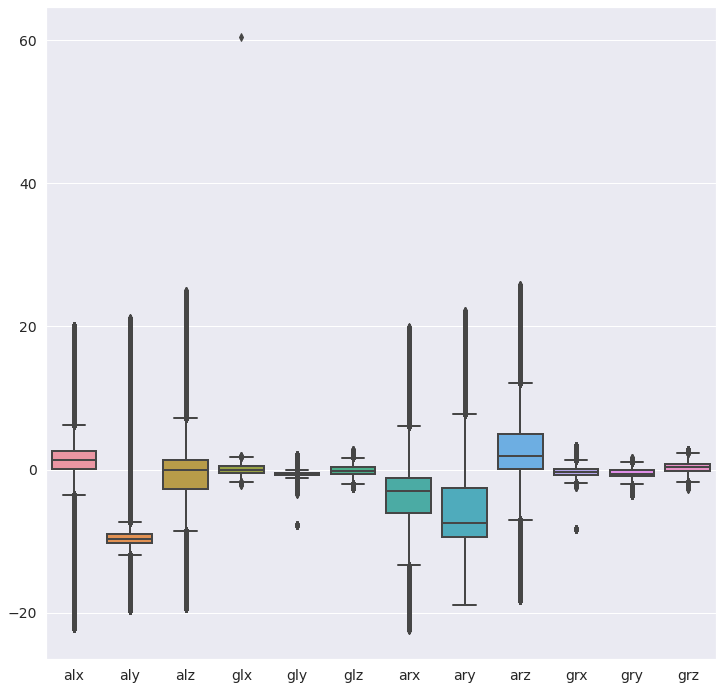

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
Features=activities_pdf.drop(['Activity'], axis = 1)
sns.boxplot(data = Features)

###<font color = purple>**Observation**
It can be ssen that there are a lot of outliers. Once we faced the outliers, what we can do are:


*   **Retention**: Don't care about the outliers ---> Do nothing
*   **Exclusion**:
     *   **Trimming**: Remove outliers
     *   **Winsorsing**: Replace outliers with specific values<br>

For now, I ignore them and I will train various models without doing anything (Retention).

##<font color=darkblue>**Check for duplicates**<font><font><a name="duplicate"></a>

In [ ]:
# check for duplicate rows
distinctDF = activities_df.distinct()
print("Distinct count: "+str(distinctDF.count()))

Distinct count: 1215745


###<font color = purple>**Observation**
Since the number of rows in my dataset is equal to the number of distinct rows, there are **no duplicate rows in the dataset**.

## <font color=darkblue>**Summary of Descriptive Statistics**<font><a name="stat"></a>

In [ ]:
activities_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
alx,1215745,1.494199962940405,3.8264854962265944,-22.146,20.054000000000002
aly,1215745,-9.692878477132252,4.171303020266935,-19.619,21.160999999999998
alz,1215745,-0.9548056442218585,5.461803177228523,-19.373,25.015
glx,1215745,-0.001598951092869012,0.49121723526298083,-2.1466,60.483999999999995
gly,1215745,-0.6166317743609627,0.3546406011909948,-7.7899,2.0113
glz,1215745,-0.15878112976213418,0.5467978786289285,-2.6267,2.7701
arx,1215745,-3.7134130845523856,4.763586417654678,-22.361,19.864
ary,1215745,-5.805526197568125,5.757639373190449,-18.972,22.191
arz,1215745,2.3938803978725938,3.8765031983757177,-18.239,25.741


###<font color = purple>**Observation**
It can be driven that feature set contains very wide
range of values. **Standardization** should be applied on the dataset.

##<font color = darkblue>**Check for Correlation between features**<font><a name="correlation"></a>
We know that having too many features in a model is not always a good thing because **it might cause overfitting** and therefore **bad generalization performance to unseen examples**. Thus, if a feature does not improve our model a lot, removing it may indeed be a better choice.

Things get even worst if there exists very high correlation between a subset of features, as keeping all of them most of the time will again cause overfitting. 

The presence of high correlation (whether it be positive or negative) can be checked by computing and visualizing the **correlation matrix**. However, this does not mean that we must always remove one of the highly correlated features. In some cases, even if two features are highly correlated they still may capture different aspects of the domain objects.

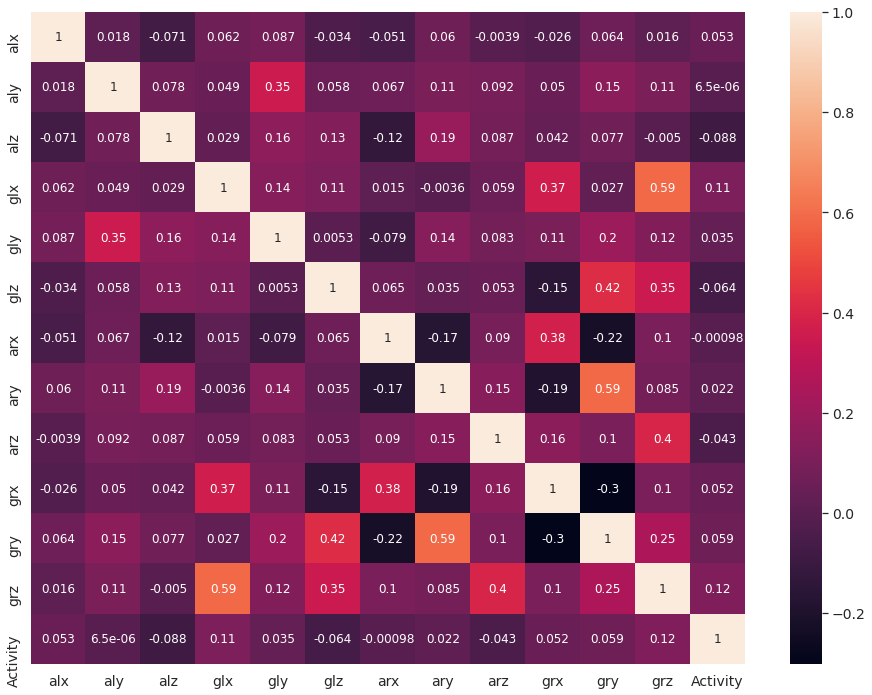

In [ ]:
Correlation_matrix = activities_pdf.corr() 
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(Correlation_matrix, annot=True)
plt.show()


###<font color = purple>**Observation**
As can be seen from the heatmap, Although some features are correlated, **there are not highly correlated features** which is a piece of good news.

## <font color = darkblue>**Check for balncing**<font><a name="balance"></a>
**Balanced vs. Unbalanced Dataset**<br>

So far, I haven't checked how the target variable is distributed across the instances of our dataset. <br>
Most often, we have to deal with unbalanced datasets. The fact that a dataset is balanced or not, affects the process which we should use to correctly splitting it into training and test set.<br> 
In the following, I am going to check the balance of my target column "Activity".


0.0     872550
1.0      30720
11.0     30720
10.0     30720
9.0      30720
5.0      30720
4.0      30720
3.0      30720
2.0      30720
7.0      29441
8.0      29337
6.0      28315
12.0     10342
Name: Activity, dtype: int64


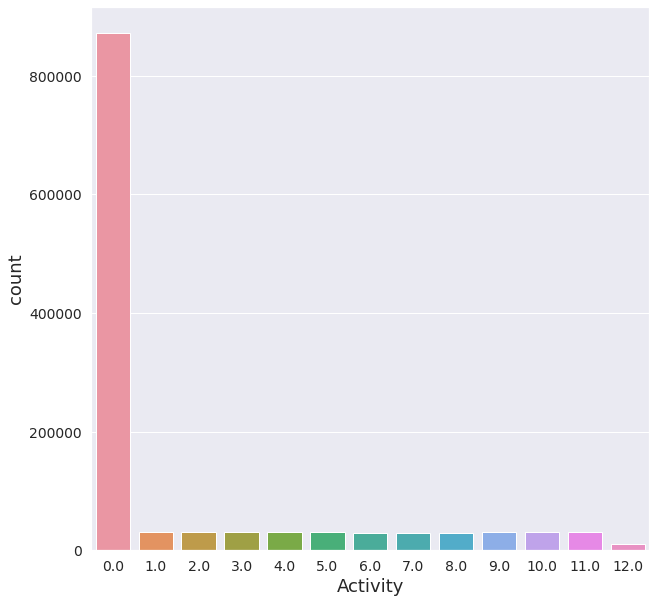

In [ ]:
# check balance of the target column
fig, ax = plt.subplots(figsize=(10, 10))
print(activities_pdf.Activity.value_counts())
sns.countplot(x='Activity',data= activities_pdf)


###<font color = purple>**Observation**
It can be seen that, the target column is imbalanced. It is needed to be balanced.

##<font color=darkblue>**Distributin plots**<font><font><a name="dist"></a>
In this part distribution of various columns will be plotted. **Note that column "subject" will not be plotted.**
 

In [ ]:
Accelerations = ["alx","aly","alz","arx","ary","arz"]
Gyroes = ["glx","gly","glz","grx","gry","grz"]
target = ["Activity"]

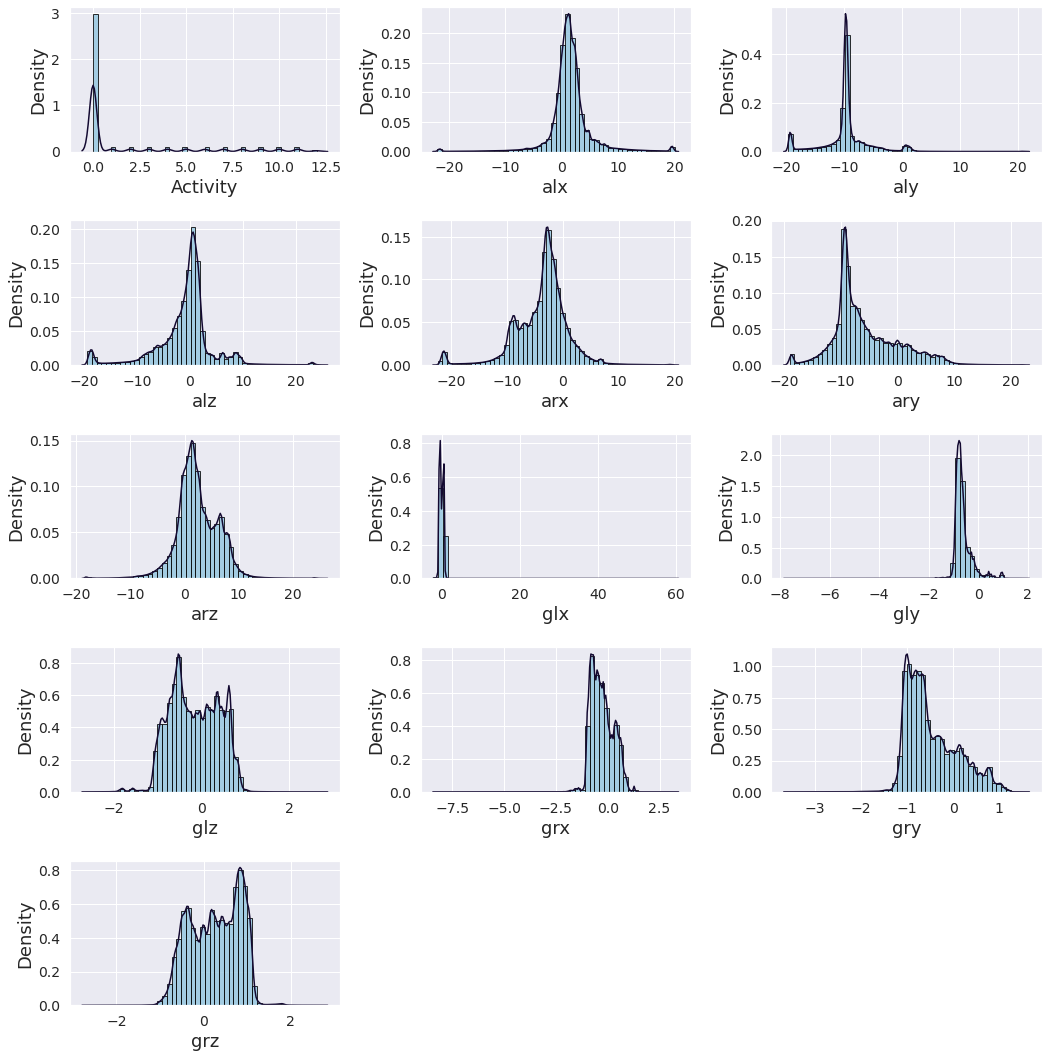

In [ ]:
# distribution of features and target columns
plot_columns = sorted(Accelerations + Gyroes + target)
fig, axes = plt.subplots(5,3, figsize=(15,15))
fig.delaxes(axes[4][2])
fig.delaxes(axes[4][1])
for i,f in enumerate(plot_columns):
  _ = sns.distplot(activities_pdf[f],
                   kde_kws={"color": "#130931", "lw": 1.5}, 
                   hist_kws={"histtype": "bar", "edgecolor": "k", "linewidth": 1,"alpha": 0.8, "color": "#92c5de"},
                   ax=axes[i//3, i%3])

fig.tight_layout(pad=1.5)


###<font color = purple>**Observation**
I have skewed data meaning that the distribution for some features **are skewed to the left or to the right**.

##<font color = darkorange>**Summary of Data Exploration section**<font><font><a name="sum"></a>
I saw that my dataset has:


*   Lots of Outliers
*   Feature set consists of a wide range of values
*   The distribution of some features are not normal and they are skewed to the left or right
*   The target column is imbalanced

---

## <font color=lightseagreen>**6. Feature Engineering**<font><a name = "engineer"></a>
---
In the **two next sections** I will train some different models, with and without winsorizing outliers, using the below supervised learning algorithms:

*   Decision Tree
*   Random Forest
*   Multilayer Perceptron<br> 

But before, **in this section**, I will address the **unbalanced target column**. Moreover,  I will define a **winsorizing function** for **cutting off the outliers**, in order to use it **in the 8th section**. <br>
Also, a standard scaler will be used to scale features when it is required.


##<font color=darkblue>**Target Column Balancing**<font><font><a name="balancement"></a>
As I saw in the data exploration section, my target feature is not well balanced. To balance it, there are three typical methods: 

*   **Oversampling**
*   **Undersampling**
*   **Cost-sensitive Learning**

>In this project, **undersampling** is used.

##<font color = blue> **Undersampling**<font><a name = "undersample"></a>
Undersampling tries to decrease the number of instances from the majority class in the data set. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like the algorithm is achieving superb results. When, in reality, it is simply always predicting the majority class.

+--------+-----+
|Activity|count|
+--------+-----+
|     8.0|29337|
|     0.0|34805|
|     7.0|29441|
|     1.0|30720|
|     4.0|30720|
|    11.0|30720|
|     3.0|30720|
|     2.0|30720|
|    10.0|30720|
|     6.0|28315|
|     5.0|30720|
|     9.0|30720|
|    12.0|10342|
+--------+-----+



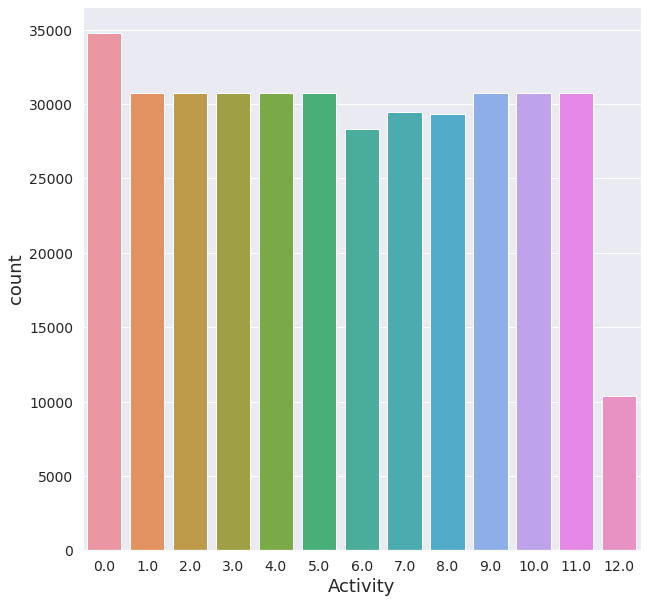

In [ ]:
majarity_df = activities_df.filter(activities_df.Activity==0)
rest_df = activities_df.filter(activities_df.Activity!=0)
majarity_df_downsampled = majarity_df.sample(False, 0.04, seed=0)
activities_df_balanced = majarity_df_downsampled.union(rest_df)
#Transform Pyspark dataframe into pandas datafarme
activities_df_balanced_pdf = activities_df_balanced.toPandas()
activities_df_balanced.groupBy(target).count().show()
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='Activity',data= activities_df_balanced_pdf)

###<font color = purple>**Observation**
Now, the target column is balanced.

##<font color = blue> **Define a Winsorising function**<font><a name= "winfunc"></a>

**Winsorizing** is a technique to deal with outliers and is named after Charles Winsor. In effect, Winsorization clips outliers to given percentiles in a symmetric fashion. For instance, we can clip to the 5th and 95th percentile.
SciPy has a winsorize() function, which performs this procedure.
> This function will be used in the 8th section.

In [ ]:
# Define a function for winsorising
from scipy.stats.mstats import winsorize
def winsorising (Data, L):
  winsorized_dataset = winsorize(Data, limits=L)
  return winsorized_dataset

##<font color = darkorange>**Summary of Feature Enguneering section**<font><font><a name="featuresum"></a>
What I have done in this section are:
*   The target column is balanced. (Undersampling was used for balancing)
*   A winsorizing function is defined and will be used when it is needed.
*   Standard Scaler will be applied to the models that need it.

---






## <font color=lightseagreen>**7. Model training and Evaluation without considering outliers**<font><a name = "pipeline"></a>

---
Let's going to train different models. What will be done are:

1.I will split the dataset into train and test sets.

2.For each learning Algorithm:




*   Select the train set and only work on this portion of the dataset
*   Configure a pipeline
*   Use a grid of parameters in order to apply hyperparameter tuning using k-fold cross validation.
*   Select the best model based on cross validation output
*   Evaluate the best model's performance and check the model generalization using test set

## <font color = darkblue>**Dataset Splitting: Training vs. Test Set**<font><a name = "split"></a>
Before moving along with any preprocessing involving data transformations, I will split the dataset into 2 portions:


*  **training set**
*  **test set**<br>

Since I balanced my target variable, I will use **random sampling** to split the dataset.

In [ ]:
# Randomly split the balanced dataset `activities_df_balanced` into 70%,30% for training and test, respectively.
train_df, test_df =activities_df_balanced.randomSplit([0.7, 0.3], seed=42)
print("Training set has {:d} samples".format(train_df.count()))
print("Test set size has {:d} samples".format(test_df.count()))

Training set has 264663 samples
Test set size has 113337 samples


### <font color = darkblue>**Working on various Learning Algorithms**<font><a name = "algorithms"></a>
Let's train and evaluate various models using:
1.   <font color= black>**Decision Tree**
2.   **Random Forest**
3.   **Multilayer Perceptron**<font>


## <font color=red>**Decision Tree**<font><a name = "dt"></a>
---
### <font color = darkblue>**Working on the Training Set only**<font><a name = "trainset"></a>
From now on, I will work on the training set portion only. The test set will be used when I want to evaluate my trained model.
I am going to train a classification tree. 

Remember that decision trees natively handle categorical features, extend to the multi-class classification, do not require feature scaling, and are able to capture non-linearities and feature interactions. Thus, there is no need to use a scaler.

I will use the DecisionTreeClassifier object provided by the PySpark API within the package pyspark.ml.classification. Also, I will apply k-fold cross validation for hyperparameter tuning. I am creating a grid of parameters with 5 values for maxDepth and 2 values for impurity.

In [ ]:
# This function defines the general pipeline for Classifiacation tree with hyperparameter tuning
def decision_tree_pipeline(train_data, 
                           features, 
                           target_variable, 
                           k_fold= 5):

    from pyspark.ml.feature import StringIndexer,VectorAssembler
    from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
    from pyspark.ml.classification import DecisionTreeClassifier
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    from pyspark.ml import Pipeline

    # Configure a decision tree pipeline, which consists of the following stages: 
    # 1.Indexing the target column and rename it as "label"
    label_indexer = StringIndexer(inputCol = target_variable, outputCol = "label")
    
    # 2.Assemble all the features into a single vector
    assembler = VectorAssembler(inputCols = features, outputCol = "features")

    # 3.Create the decision tree transformer
    dt = DecisionTreeClassifier(featuresCol = "features", labelCol = "label", seed = 20)

    # 4. Set up the pipeline
    pipeline = Pipeline(stages =[label_indexer] + [assembler] + [dt])

    # A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
    # ParamGridBuilder is used to construct a grid of parameters to search over.
    # I use a grid with  5 values for dt.maxDepth and 2 values for dt.impurity
    # This grid will have 5 x 2 = 10 parameter settings for CrossValidator to choose from.
    param_grid = ParamGridBuilder()\
    .addGrid(dt.maxDepth, [5, 10, 12, 15, 20]) \
    .addGrid(dt.impurity, ["gini", "entropy"]) \
    .build()
    
    cross_val = CrossValidator(estimator = pipeline, 
                               estimatorParamMaps = param_grid,
                               evaluator = MulticlassClassificationEvaluator(metricName = "accuracy"),
                               numFolds = k_fold,
                               collectSubModels = False
                               )
    dt_cv_model = cross_val.fit(train_data)

    return dt_cv_model

In [ ]:
Features=["alx","aly","alz","glx","gly","glz","arx","ary","arz","grx","gry","grz"]
dt_cv_model = decision_tree_pipeline(train_df, Features, "Activity")

In [ ]:
for i, avg_accuracy in enumerate(dt_cv_model.avgMetrics):
    print("Avg. accuracy computed across k-fold cross validation for model setting #{:d}: {:.2f}".format(i+1, avg_accuracy))

Avg. accuracy computed across k-fold cross validation for model setting #1: 0.50
Avg. accuracy computed across k-fold cross validation for model setting #2: 0.56
Avg. accuracy computed across k-fold cross validation for model setting #3: 0.78
Avg. accuracy computed across k-fold cross validation for model setting #4: 0.81
Avg. accuracy computed across k-fold cross validation for model setting #5: 0.83
Avg. accuracy computed across k-fold cross validation for model setting #6: 0.86
Avg. accuracy computed across k-fold cross validation for model setting #7: 0.88
Avg. accuracy computed across k-fold cross validation for model setting #8: 0.90
Avg. accuracy computed across k-fold cross validation for model setting #9: 0.91
Avg. accuracy computed across k-fold cross validation for model setting #10: 0.92


In [ ]:
print("Best model according to k-fold cross validation: maxDepth = ",dt_cv_model.bestModel.stages[-1].getMaxDepth(),
      ", Impurity = ",dt_cv_model.bestModel.stages[-1].getImpurity())
print(dt_cv_model.bestModel.stages[-1])

Best model according to k-fold cross validation: maxDepth =  20 , Impurity =  entropy
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_69a49296821e, depth=20, numNodes=22477, numClasses=13, numFeatures=12


###<font color = purple>**Observation**
As it turns out, increasing the max_depth of the tree improves the performance of the model. Moreover, it can be driven that in terms of impurity "entropy" was better than "gini".

### <font color = darkblue>**Check for generalization of the best model using test set**<font><a name = "dtgeneral"></a>

Now, I am going to use the test set to evaluate the trained model.
I will use the **best model from k-fold cross validation** to make predictions.


In [ ]:
# Make predictions on the test set
dt_predictions = dt_cv_model.transform(test_df)

Evaluate model performance on the **Test Set**

In [ ]:
def evaluate_model(prediction):
  from pyspark.ml.evaluation import MulticlassClassificationEvaluator

  Acc_evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
  f1_evaluator = MulticlassClassificationEvaluator(metricName="weightedFMeasure")
  Recall_evaluator = MulticlassClassificationEvaluator(metricName="weightedRecall")
  Precision_evaluator = MulticlassClassificationEvaluator(metricName="weightedPrecision")

  print("Accuracy is: ", round(Acc_evaluator.evaluate(prediction),2))
  print("Weighted Fscore is: ", round(f1_evaluator.evaluate(prediction),2))
  print("Weighted Recall is: ", round(Recall_evaluator.evaluate(prediction),2))
  print("Weighted Precision is: ", round(Precision_evaluator.evaluate(prediction),2))

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
print("***** Evalution metrics for best model feeding with Test Set *****")
evaluate_model(dt_predictions)

***** Evalution metrics for best model feeding with Test Set *****
Accuracy is:  0.93
Weighted Fscore is:  0.93
Weighted Recall is:  0.93
Weighted Precision is:  0.92


###<font color = purple>**Observation**
Since the accuracy of the best model on the test set (which was unseen for the model during the training phase) did not decrease, there is not overfitting and the model has good generallization.

## <font color = darkblue>**Feature Importance**<font><a name = "featureimp"></a>

When we are fitting a tree-based model, such as a decision tree, random forest, or gradient boosted tree, it is helpful to be able to review the feature importance levels along with the feature names. Typically models in SparkML are fit as the last stage of the pipeline. <br>To extract the relevant feature information from the pipeline with the tree model, we must extract the correct pipeline stage. 
I am going to extract the feature Importance for best model.


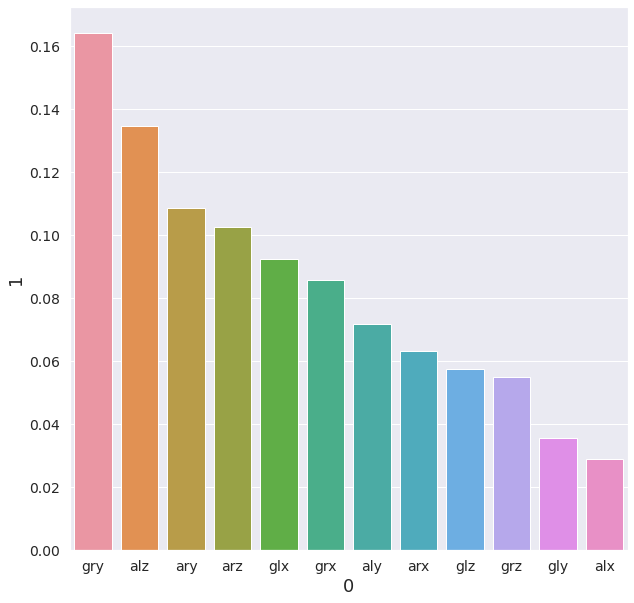

In [ ]:
#Feature importance
import pandas as pd
best_tree = dt_cv_model.bestModel.stages[-1]
va = dt_cv_model.bestModel.stages[-2] 
Feature_importance = pd.DataFrame(list(zip(va.getInputCols(), best_tree.featureImportances)))
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=0, y=1, data=Feature_importance.sort_values(by=1, ascending= False))

I am going to select top 7 features and fit the DT only with these features.

In [ ]:
Important_Features=["gry","alz","ary","arz","grx","glx","aly"]
dt_cv_model_impf = decision_tree_pipeline(train_df, Important_Features, "Activity")

In [ ]:
for i, avg_accuracy in enumerate(dt_cv_model_impf.avgMetrics):
    print("Avg. accuracy computed across k-fold cross validation for model setting #{:d}: {:.2f}".format(i+1, avg_accuracy))

Avg. accuracy computed across k-fold cross validation for model setting #1: 0.50
Avg. accuracy computed across k-fold cross validation for model setting #2: 0.55
Avg. accuracy computed across k-fold cross validation for model setting #3: 0.75
Avg. accuracy computed across k-fold cross validation for model setting #4: 0.79
Avg. accuracy computed across k-fold cross validation for model setting #5: 0.80
Avg. accuracy computed across k-fold cross validation for model setting #6: 0.83
Avg. accuracy computed across k-fold cross validation for model setting #7: 0.86
Avg. accuracy computed across k-fold cross validation for model setting #8: 0.87
Avg. accuracy computed across k-fold cross validation for model setting #9: 0.88
Avg. accuracy computed across k-fold cross validation for model setting #10: 0.89


###<font color = purple>**Observation**
The average accuracy of the decision tree decreased. Thus, I decided to keep features.

##<font color = darkorange>**Summary of Decision Tree**<font><font><a name="dtsummary"></a>
To sum up, I saw that by increasing the depth of the tree, the accuracy of the model increased. Furthermore, In terms of impurity, I understood that "entropy" leads to a better performance in comparison with "gini". Moreover, considering only the top 7 features did not improve the accuracy of the model.
The highest accuracy that I got were 92%, 93% for trainand test sets, respectively.

---

## <font color=red>**Random Forest**<font><a name = "rf"></a>
---
### <font color = darkblue>**Working on the Training Set only**<font><a name = "rftrainset"></a>
Just like decision tree, first I will train models using the train set. A paramgrid with 2 values for maxDepth and 3 values for numTrees is used for CrossValidator to choose from.

In [ ]:
# This function defines the general pipeline for Random Forest with hyperparameter tuning
def random_forest_pipeline(train_data, 
                           features, 
                           target_variable, 
                           k_fold= 5):
    from pyspark.ml.feature import StringIndexer,VectorAssembler
    from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
    from pyspark.ml.classification import RandomForestClassifier
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    from pyspark.ml import Pipeline

    # Configure a random forest pipeline, which consists of the following stages: 

    # 1.Indexing the target column and rename it as "label"
  
    label_indexer = StringIndexer(inputCol = target_variable, outputCol = "label")
    
    # 2.Assemble all the features into a single vector
    assembler = VectorAssembler(inputCols = features, outputCol="features") 

    # 3.Create the random forest transformer
    rf = RandomForestClassifier(featuresCol = "features", labelCol = "label", impurity = "entropy", seed = 42)

    # 4. Set up the pipeline
    pipeline = Pipeline(stages=[label_indexer] + [assembler] + [rf])

    # A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
    # ParamGridBuilder is used to construct a grid of parameters to search over.
    # I use a paramgrid with 2 values for rf.maxDepth and 3 values for rf.numTrees
    # this grid will have 2 * 3 = 6 parameter settings for CrossValidator to choose from.
    param_grid = ParamGridBuilder()\
    .addGrid(rf.maxDepth, [5, 12]) \
    .addGrid(rf.numTrees, [5, 10, 15]) \
    .build()
    
    cross_val = CrossValidator(estimator = pipeline, 
                               estimatorParamMaps = param_grid,
                               evaluator = MulticlassClassificationEvaluator(metricName="accuracy"),
                               numFolds = k_fold,
                               collectSubModels = False
                               )

    # Run cross-validation, and choose the best set of parameters.
    rf_cv_model = cross_val.fit(train_data)

    return rf_cv_model

In [ ]:
Features = ["alx","aly","alz","glx","gly","glz","arx","ary","arz","grx","gry","grz"]
rf_cv_model = random_forest_pipeline(train_df, Features, "Activity")

In [ ]:
for i, avg_accuracy in enumerate(rf_cv_model.avgMetrics):
    print("Avg. Accuracy computed across k-fold cross validation for model setting #{:d}: {:.2f}".format(i+1, avg_accuracy))

Avg. Accuracy computed across k-fold cross validation for model setting #1: 0.65
Avg. Accuracy computed across k-fold cross validation for model setting #2: 0.68
Avg. Accuracy computed across k-fold cross validation for model setting #3: 0.67
Avg. Accuracy computed across k-fold cross validation for model setting #4: 0.89
Avg. Accuracy computed across k-fold cross validation for model setting #5: 0.91
Avg. Accuracy computed across k-fold cross validation for model setting #6: 0.91


###<font color = purple>**Observation**
As it turns out, increasing the max_depth improves the performance of the model. Moreover, it can be driven that increasing the number of trees does not affect too much the accuracy of the model.

In [ ]:
print(" Best model according to k-fold cross validation: maxDepth = ",rf_cv_model.bestModel.stages[-1]._java_obj.getMaxDepth(),
      ", numTrees = ", rf_cv_model.bestModel.stages[-1]._java_obj.getNumTrees()
      )
print(rf_cv_model.bestModel.stages[-1])

 Best model according to k-fold cross validation: maxDepth =  12 , numTrees =  15
RandomForestClassificationModel: uid=RandomForestClassifier_1f5f74c82960, numTrees=15, numClasses=13, numFeatures=12


### <font color = darkblue>**Check for generalization of the best model using test set**<font><a name = "rfgeneral"></a>
Now, I am going to use the test set to evaluate the trained model. I will use the best model from **k-fold cross validation to make predictions.**

In [ ]:
# Make predictions on the test set 
rf_predictions = rf_cv_model.transform(test_df)

Evaluate model performance on the **Test Set**

In [ ]:
print("***** Evalution metrics for best model feeding with Test Set *****")
evaluate_model(rf_predictions)


***** Evalution metrics for best model feeding with Test Set *****
Accuracy is:  0.91
Weighted Fscore is:  0.9
Weighted Recall is:  0.91
Weighted Precision is:  0.91


###<font color = purple>**Observation**
Since the accuracy of the best model on the test set (which was unseen for the model during the training phase) did not decrease, there is not overfitting and the model has good generalization.

## <font color = darkblue>**Feature Importance**<font><a name = rffeatureimp></a>

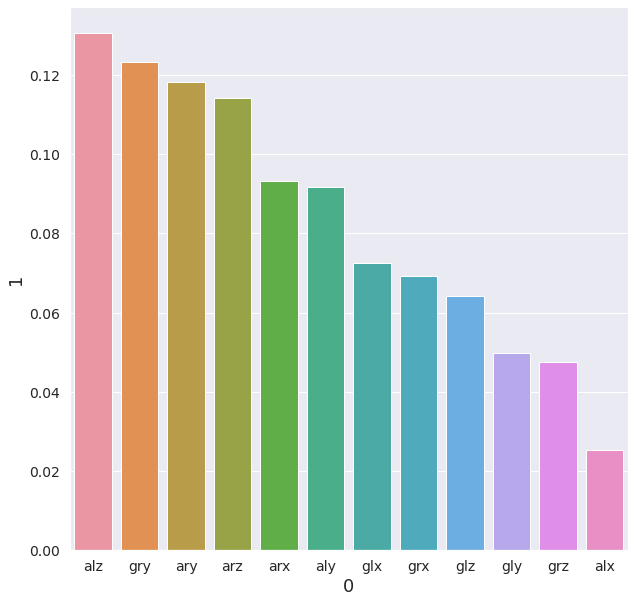

In [ ]:
#Feature importance
import pandas as pd
best_tree = rf_cv_model.bestModel.stages[-1]
va = rf_cv_model.bestModel.stages[-2] 
Feature_importance = pd.DataFrame(list(zip(va.getInputCols(), best_tree.featureImportances)))
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=0, y=1, data=Feature_importance.sort_values(by=1, ascending= False))

I am going to select top 3 features and fit the RF only with these features.

In [ ]:
rf_Important_Features=["alz","gry","ary"]
rf_cv_model_impf = random_forest_pipeline(train_df, rf_Important_Features, "Activity")

In [ ]:
for i, avg_accuracy in enumerate(rf_cv_model_impf.avgMetrics):
    print("Avg. accuracy computed across k-fold cross validation for model setting #{:d}: {:.2f}".format(i+1, avg_accuracy))

Avg. accuracy computed across k-fold cross validation for model setting #1: 0.51
Avg. accuracy computed across k-fold cross validation for model setting #2: 0.51
Avg. accuracy computed across k-fold cross validation for model setting #3: 0.50
Avg. accuracy computed across k-fold cross validation for model setting #4: 0.64
Avg. accuracy computed across k-fold cross validation for model setting #5: 0.64
Avg. accuracy computed across k-fold cross validation for model setting #6: 0.64


###<font color = purple>**Observation**
Taking the top features was not useful since the accuracy of the model decreased. Therefore, I decided to keep all features.


##<font color = darkorange>**Summary of Random forest**<font><font><a name="rfsummary"></a>
To sum up, I saw that by increasing the maxDepth,and  numTrees the accuracy of the model increased.
The highest accuracy that I got was 91% for both training and test sets.



---

## <font color=red>**Multilayer Perceptron**<font><a name = "mlp"></a>
---
### <font color = darkblue>**Working on the Training Set only**<font><a name = "mlptrainset"></a>
Like before, first I will train models using the train set. A paramgrid with 2 value for maxItr and 2 values for layers is used for CrossValidator to choose from.

For this algorithm, I will train models with and without scaler and compare them to notice the effects of scaler.

### <font color = darkblue>**Train models without a scaler**<font><a name = "mlpnoscaler"></a>


In [ ]:
# This function defines the pipeline for MLP with hyperparameter tuning, without feature scaling
def Multilaye_Perceptron_pipeline_without_scaler(train, 
                           features, 
                           target_variable, 
                           k_fold=5):
    from pyspark.ml.feature import StringIndexer,VectorAssembler, StandardScaler
    from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
    from pyspark.ml.classification import MultilayerPerceptronClassifier
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    from pyspark.ml import Pipeline
  
    # Configure a MLP pipeline, which consists of the following stages: 

    # 1.Indexing the target column and rename it as "label"
  
    label_indexer = StringIndexer(inputCol = target_variable, outputCol = "label")
    
    # 2.Assemble all the features into a single vector
    assembler = VectorAssembler(inputCols = Features, outputCol="features")

    # 3.Create the MLP transformer
    MLP = MultilayerPerceptronClassifier(featuresCol = "features", labelCol ="label", blockSize = 128, seed = 4)

    # 3.Add the random forest transformer to the pipeline stages (i.e., the last one)
    stages = [label_indexer] + [assembler] + [MLP]

    # 4.Set up the pipeline
    pipeline = Pipeline(stages=stages)
    
    # ParamGridBuilder is used to construct a grid of parameters to search over.
    # A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
    # I use a paramgrid with 2 values for MLP.maxIter and 2 values for MLP.layers
    # this grid will have 2*2 = 4 parameter settings for CrossValidator to choose from.
    param_grid = ParamGridBuilder() \
    .addGrid(MLP.maxIter, [50, 100]) \
    .addGrid(MLP.layers, [[12,8,10,13],[12,8,10,15,13],[12,8 ,10, 15,8, 13],[12, 8, 10, 15, 8, 6, 13]]) \
    .build()
    
    cross_val = CrossValidator(estimator = pipeline, 
                               estimatorParamMaps=param_grid,
                               evaluator = MulticlassClassificationEvaluator(metricName="accuracy"), 
                               numFolds = k_fold,
                               collectSubModels = False
                               )

    # Run cross-validation, and choose the best set of parameters.
    MLP_ws_cv_model = cross_val.fit(train)
    return MLP_ws_cv_model

In [ ]:
MLP_ws_cv_model = Multilaye_Perceptron_pipeline_without_scaler(train_df, Features, "Activity")

In [ ]:
for i, avg_accuracy in enumerate(MLP_ws_cv_model.avgMetrics):
    print("Avg. Accuracy computed across k-fold cross validation for model setting #{:d}: {:.2f}".format(i+1, avg_accuracy))

Avg. Accuracy computed across k-fold cross validation for model setting #1: 0.49
Avg. Accuracy computed across k-fold cross validation for model setting #2: 0.48
Avg. Accuracy computed across k-fold cross validation for model setting #3: 0.44
Avg. Accuracy computed across k-fold cross validation for model setting #4: 0.35
Avg. Accuracy computed across k-fold cross validation for model setting #5: 0.53
Avg. Accuracy computed across k-fold cross validation for model setting #6: 0.54
Avg. Accuracy computed across k-fold cross validation for model setting #7: 0.49
Avg. Accuracy computed across k-fold cross validation for model setting #8: 0.39


In [ ]:
print(" Best model according to k-fold cross validation: maxIter = ",MLP_ws_cv_model.bestModel.stages[-1].getMaxIter(),
      "Layers = ",MLP_ws_cv_model.bestModel.stages[-1].getLayers())

 Best model according to k-fold cross validation: maxIter =  100 Layers =  [12, 8, 10, 15, 13]


### <font color = darkblue>**Check for generalization of the best model using test set**<font><a name = "mlpwgeneral"></a>
Now, I am going to use tes set to evaluate the trained model. I will use the best model from **k-fold cross validation to make predictions.**

Evaluate model performance on the **Test Set**

In [ ]:
# Make predictions on the test set
mlp_ws_predictions = MLP_ws_cv_model.transform(test_df)

In [ ]:
print("***** Evalution metrics for best model feeding with Test Set *****")
evaluate_model(mlp_ws_predictions)

***** Evalution metrics for best model feeding with Test Set *****
Accuracy is:  0.51
Weighted Fscore is:  0.46
Weighted Recall is:  0.51
Weighted Precision is:  0.48


###<font color = purple>**Observation**
The accuracy of the MLP without scaling the features was not satisfying. The best computed accuracy for the train set and test set were       , respectively.<br>I will check the performance of models in case of using a scaler to the pipeline of the model.

### <font color = darkblue>**Train models with a scaler**<font><a name = "mlpscaler"></a>


In [ ]:
# This function defines the general pipeline for MLP with hyperparameter tuning and with a scaler
def Multilaye_Perceptron_pipeline(train, 
                           features, 
                           target_variable, 
                           with_std=True,
                           with_mean=True,
                           k_fold=5):
    from pyspark.ml.feature import StringIndexer,VectorAssembler, StandardScaler
    from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
    from pyspark.ml.classification import MultilayerPerceptronClassifier
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    from pyspark.ml import Pipeline
  
    # Configure a MLP pipeline, which consists of the following stages: 

    # 1.Indexing the target column and rename it as "label"
  
    label_indexer = StringIndexer(inputCol = target_variable, outputCol = "label")
    
    # 2.Assemble all the features into a single vector
    assembler = VectorAssembler(inputCols = features, outputCol="features")
    # 2.a Create the StandardScaler
    scaler = StandardScaler(inputCol=assembler.getOutputCol(), outputCol="std_"+assembler.getOutputCol(), withStd=with_std, withMean=with_mean)
    
    # 4.Create the MLP transformer]
    MLP = MultilayerPerceptronClassifier(featuresCol = "std_features", labelCol ="label", blockSize = 128, seed = 4)

    # 3.Add the random forest transformer to the pipeline stages (i.e., the last one)
    stages = [label_indexer] + [assembler] +[scaler] + [MLP]

    # 4.Set up the pipeline
    pipeline = Pipeline(stages=stages)
    
    # ParamGridBuilder is used to construct a grid of parameters to search over.
    # A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
    # I use a paramgrid with 3 values for rf.maxDepth and 3 values for rf.numTrees
    # this grid will have 3 x 3 = 9 parameter settings for CrossValidator to choose from.
    param_grid = ParamGridBuilder() \
    .addGrid(MLP.maxIter, [50, 100]) \
    .addGrid(MLP.layers, [[12,4 ,5, 8, 13],[12, 8, 10, 6, 8, 13]]) \
    .build()
    
    cross_val = CrossValidator(estimator = pipeline, 
                               estimatorParamMaps=param_grid,
                               evaluator = MulticlassClassificationEvaluator(metricName="accuracy"), 
                               numFolds = k_fold,
                               collectSubModels = True 
                               )

    # Run cross-validation, and choose the best set of parameters.
    MLP_cv_model = cross_val.fit(train)

    return MLP_cv_model

In [ ]:
MLP_cv_model = Multilaye_Perceptron_pipeline(train_df, Features, "Activity")


In [ ]:
for i, avg_accuracy in enumerate(MLP_cv_model.avgMetrics):
    print("Avg. Accuracy computed across k-fold cross validation for model setting #{:d}: {:.2f}".format(i+1, avg_accuracy))

Avg. Accuracy computed across k-fold cross validation for model setting #1: 0.42
Avg. Accuracy computed across k-fold cross validation for model setting #2: 0.43
Avg. Accuracy computed across k-fold cross validation for model setting #3: 0.51
Avg. Accuracy computed across k-fold cross validation for model setting #4: 0.56


In [ ]:
print(" maxIter:",MLP_cv_model.bestModel.stages[-1].getMaxIter(),"Layers:",
      MLP_cv_model.bestModel.stages[-1].getLayers())


 maxIter: 100 Layers: [12, 8, 10, 6, 8, 13]


### <font color = darkblue>**Check for generalization of the best model using test set**<font><a name = "mlpgeneral"></a>
Now, I am going to use tes set to evaluate the trained model. I will use the best model from **k-fold cross validation to make predictions.**

In [ ]:
# Make predictions on the test set (`MLP_cv_model` contains the best model according to the result of k-fold cross validation)
mlp_predictions = MLP_cv_model.transform(test_df)

Evaluate model performance on the **Test Set**

In [ ]:
print("***** Evalution metrics for best model feeding with Test Set *****")
evaluate_model(mlp_predictions)

***** Evalution metrics for best model feeding with Test Set *****
Accuracy is:  0.6
Weighted Fscore is:  0.55
Weighted Recall is:  0.6
Weighted Precision is:  0.55


##<font color = darkorange>**Summary of Multilayer Perceptron**<font><font><a name="mlpsummary"></a>
To sum up, I saw that adding a scaler improved the performance of the trained models. Furthermore, the average accuracy has increased by adding more layers. But still, it was worse than Decision tree and random forest. The highest accuracy that I have got are as below:


*   Without scaler: For train set: 43%, for test set: 43%
*   With scaler:    For train set: 55%, for test set: 60%



---

## <font color=lightseagreen>**8. Model training and Evaluation with winsorized outliers**<font><a name = "pipelinewinso"></a>
---

Untill now, I have considered unbalancing and wide range of values in the feature set. But, I have not examine outliers.
In the following, I am going to winsorized outliers. Then, I will train all models again, this time feeding them by winsorized train data.



## <font color = darkblue>**Check for outliers in the balanced datset**<font><a name = "outwinso"></a>


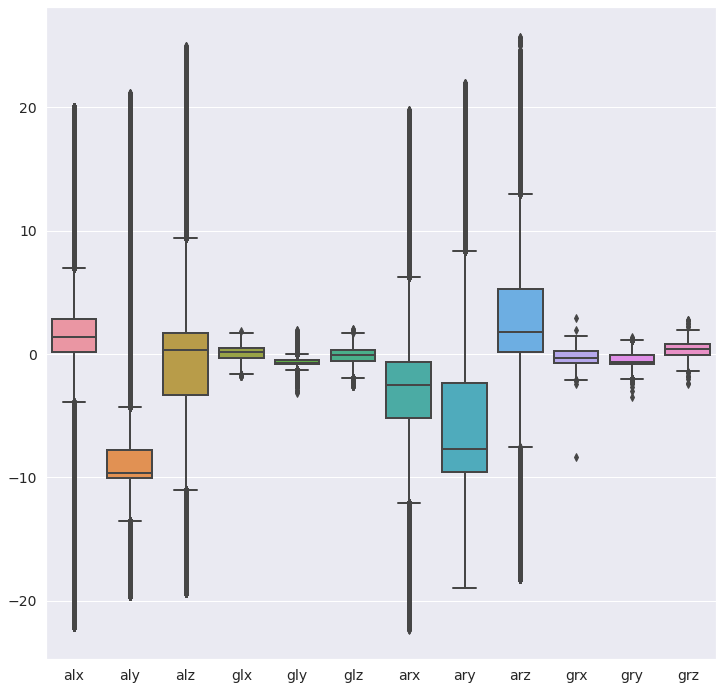

In [ ]:
train_pdf = train_df.toPandas()
fig, ax = plt.subplots(figsize=(12,12))
Features = train_pdf.drop(['Activity'], axis = 1)
sns.boxplot(data = Features)

###<font color = purple>**Observation**
Untill now, I have done Nothing for dealing with outliers. Now, I will examine the effects of dealing with outliers on the performance of the trained models.<br>
I am going to plot a boxplot for each feature separately. Then, based on their boxplots, the best method for dealing with the outliers will be chosen.

***NOTE:*** Due to the large number of outliers in most of the times, I will use **winsorising**.

##<font color = blue> **Winsorising**<font><a name= "winsorization"></a>

**Winsorizing** is a technique to deal with outliers and is named after Charles Winsor. In effect, Winsorization clips outliers to given percentiles in a symmetric fashion. For instance, we can clip to the 5th and 95th percentile.
SciPy has a winsorize() function, which performs this procedure.

In [ ]:
# fig, ax = plt.subplots(figsize=(15,15))
# win = train_df.drop("Activity", "subject").toPandas()
# winsorized_train = winsorising(win, [0.05,0.05])
# sns.boxplot(data = winsorized_train)
# plt.show()


####<font color = blue> **Cheking Outliers for each feature**<font> 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


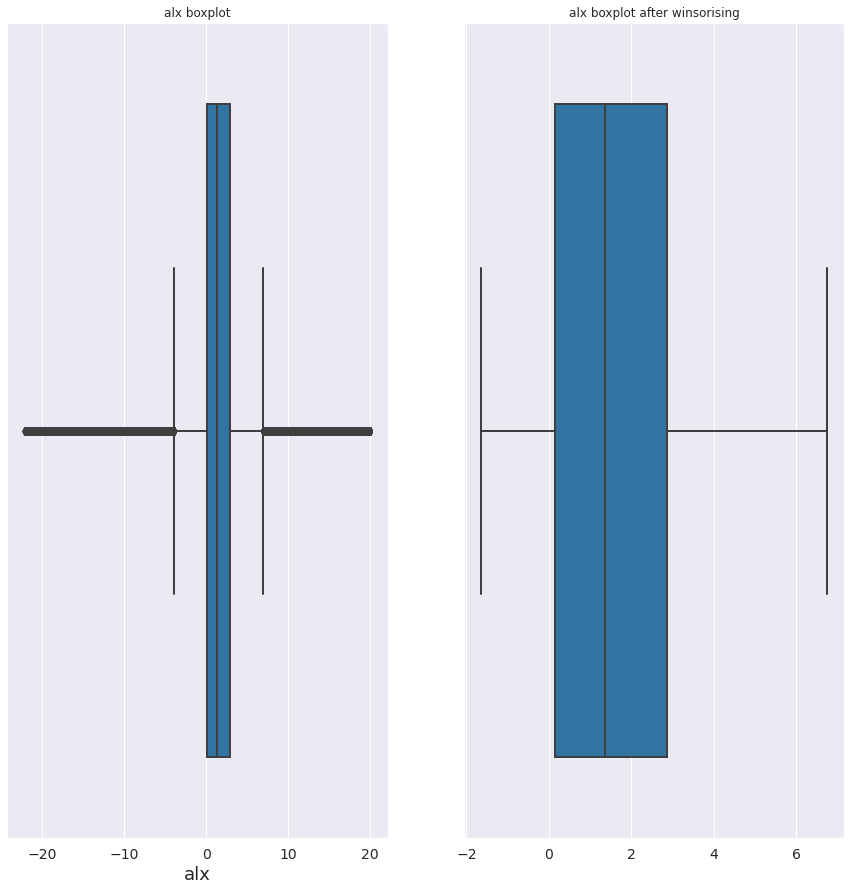

In [ ]:
#checking outlier for alx
fig, ax = plt.subplots(figsize=(15,15))
alx_data = train_pdf.alx
plt.subplot(1,2,1)
plt.title("alx boxplot")
sns.boxplot(alx_data)
winsorized_alx = winsorising(alx_data, 0.07) #I found the limit value by test and try
plt.subplot(1,2,2)
plt.title("alx boxplot after winsorising")
sns.boxplot(winsorized_alx)
train_pdf.alx = winsorized_alx 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


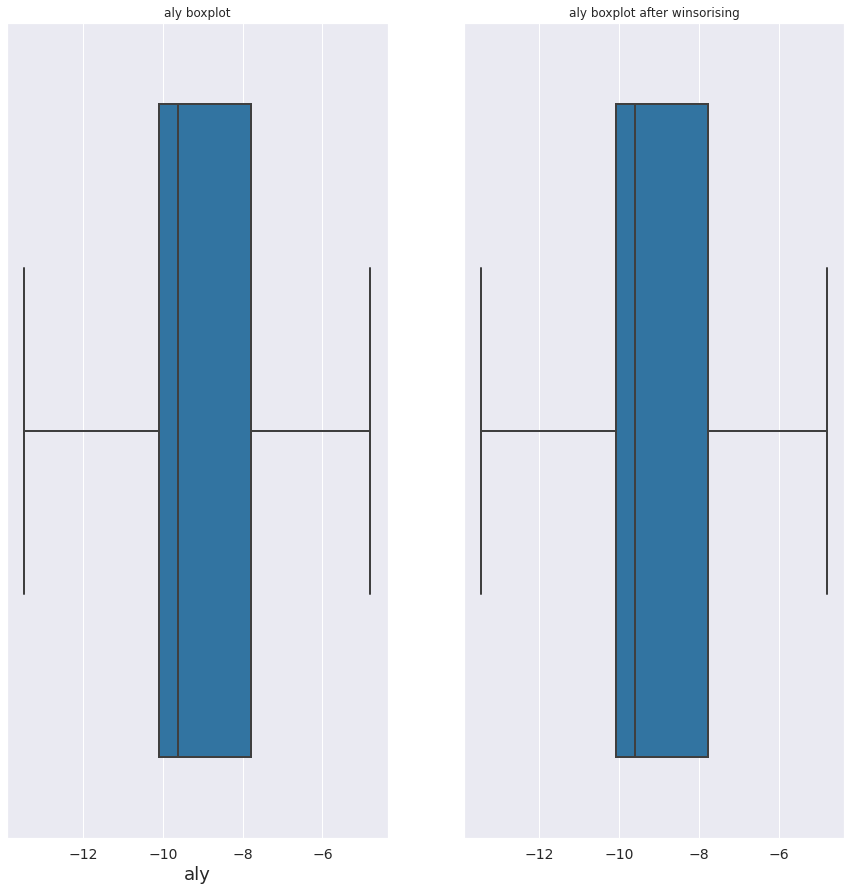

In [ ]:
#checking outlier for aly
fig, ax = plt.subplots(figsize=(15,15))
aly_data = train_pdf.aly
plt.subplot(1,2,1)
plt.title("aly boxplot")
sns.boxplot(aly_data)
winsorized_aly = winsorising(aly_data, 0.135) #I found the limit value by test and try
plt.subplot(1,2,2)
plt.title("aly boxplot after winsorising")
sns.boxplot(winsorized_aly)
train_pdf.aly = winsorized_aly 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


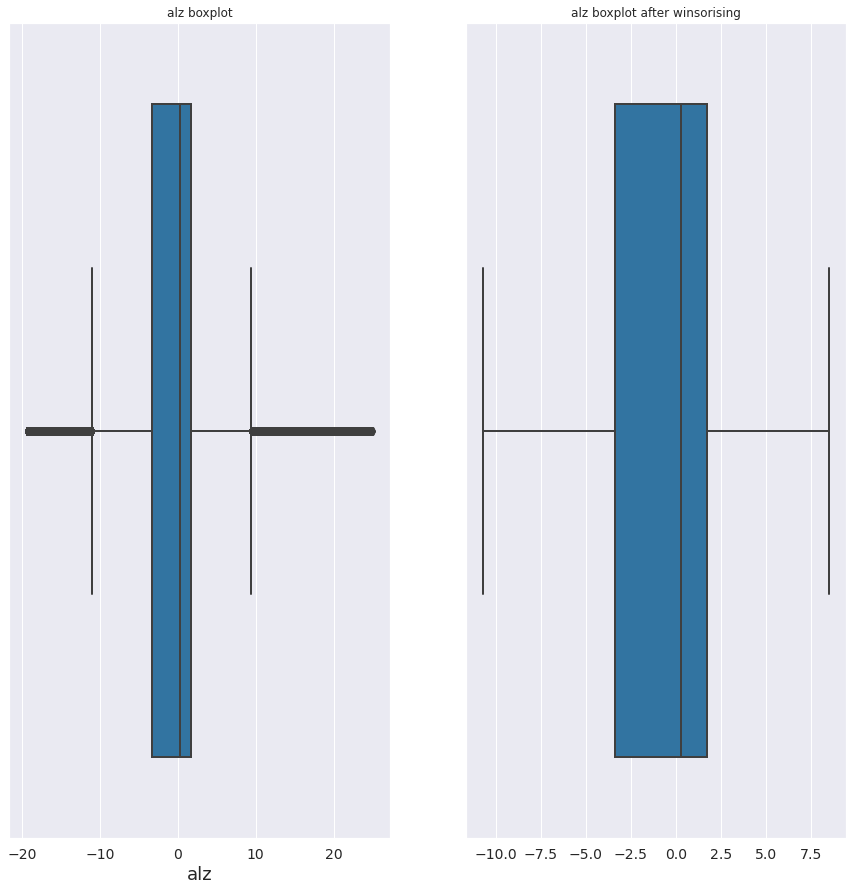

In [ ]:
#checking outlier for alz
fig, ax = plt.subplots(figsize=(15,15))
alz_data = train_pdf.alz
plt.subplot(1,2,1)
plt.title("alz boxplot")
sns.boxplot(alz_data)
winsorized_alz = winsorising(alz_data, 0.065) #I found the limit value by test and try
plt.subplot(1,2,2)
plt.title("alz boxplot after winsorising")
sns.boxplot(winsorized_alz)
train_pdf.alz = winsorized_alz 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


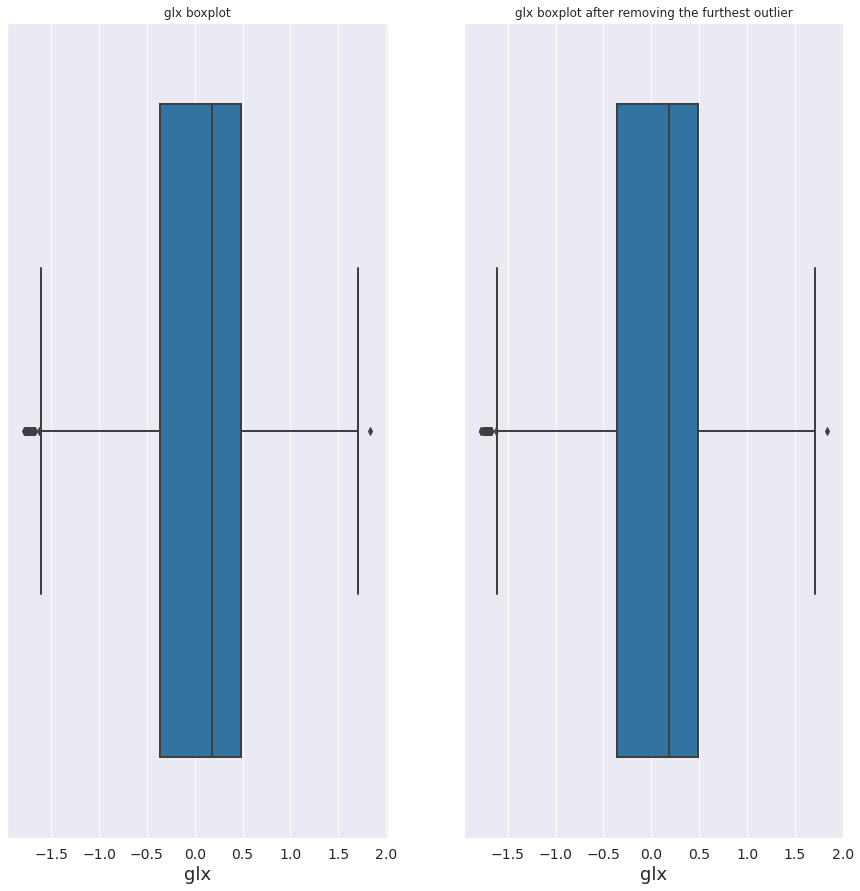

In [ ]:
#checking outlier for glx
fig, ax = plt.subplots(figsize=(15,15))
glx_data = train_pdf.glx
plt.subplot(1,2,1)
plt.title("glx boxplot")
sns.boxplot(glx_data)
#remove one of the datapoints which is more far from the others. Consider it as a noise
train_pdf = train_pdf.drop(train_pdf[train_pdf.glx > 10].index)
plt.subplot(1,2,2)
plt.title("glx boxplot after removing the furthest outlier")
sns.boxplot(train_pdf.glx) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


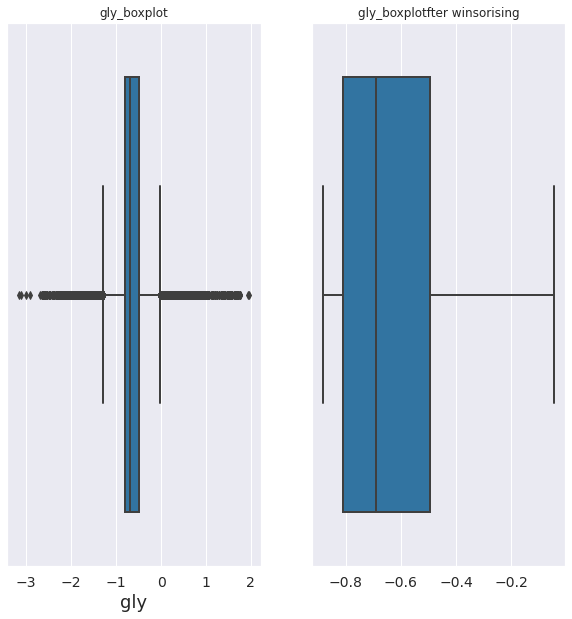

In [ ]:
#checking outlier for gly
fig, ax = plt.subplots(figsize=(10,10))
gly_data = train_pdf.gly
plt.subplot(1,2,1)
plt.title("gly_boxplot")
sns.boxplot(gly_data)
winsorized_gly = winsorising(gly_data, 0.1) #I found the limit value by test and try
plt.subplot(1,2,2)
plt.title("gly_boxplotfter winsorising")
sns.boxplot(winsorized_gly)
train_pdf.gly = winsorized_gly

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


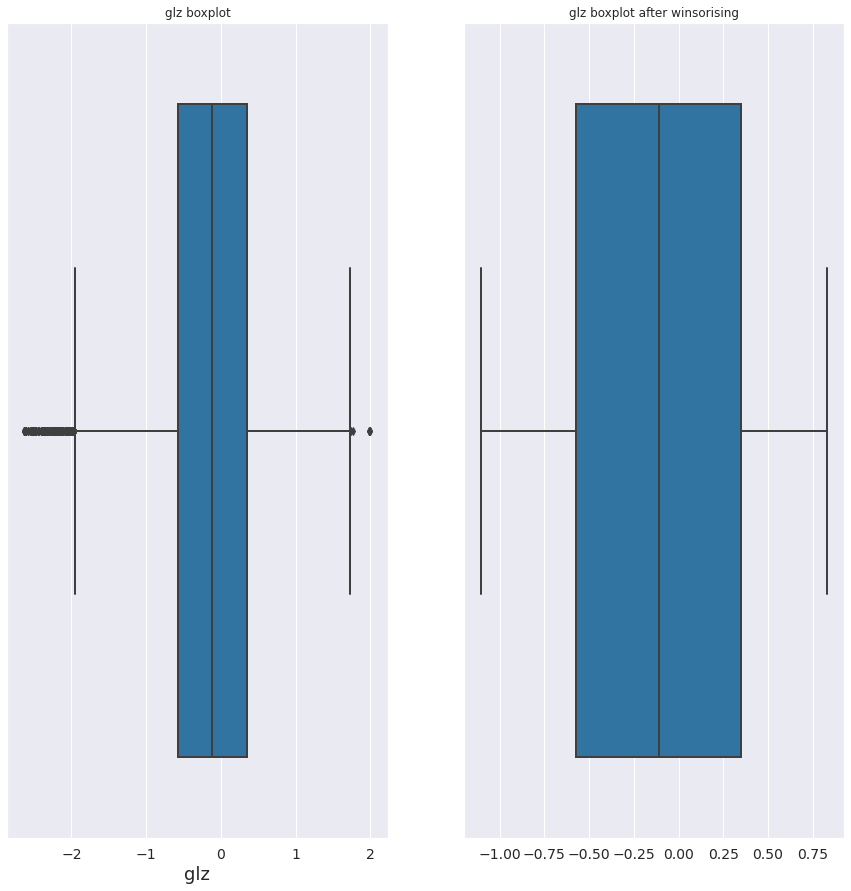

In [ ]:
#checking outlier for glz
fig, ax = plt.subplots(figsize=(15,15))
glz_data = train_pdf.glz
plt.subplot(1,2,1)
plt.title("glz boxplot")
sns.boxplot(glz_data)
winsorized_glz = winsorising(glz_data, 0.01) #I found the limit value by test and try
plt.subplot(1,2,2)
plt.title("glz boxplot after winsorising")
sns.boxplot(winsorized_glz)
train_pdf.glz = winsorized_glz

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


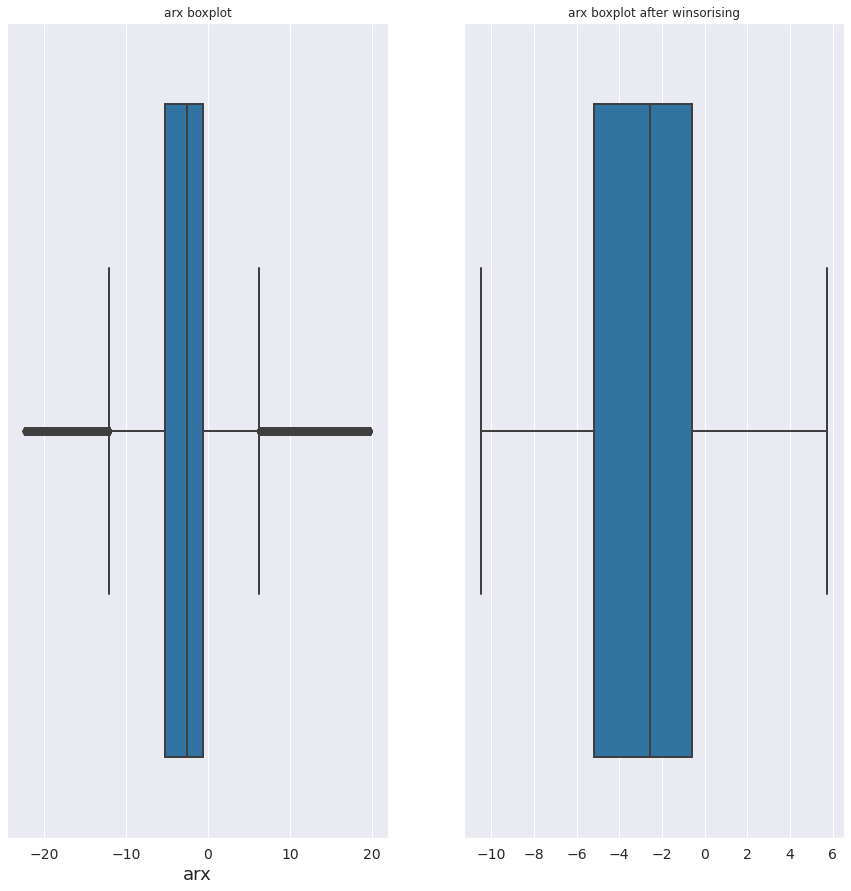

In [ ]:
#checking outlier for arx
fig, ax = plt.subplots(figsize=(15,15))
arx_data = train_pdf.arx
plt.subplot(1,2,1)
plt.title("arx boxplot")
sns.boxplot(arx_data)
winsorized_arx = winsorising(arx_data, [0.08,0.03]) #I found the limit value by test and try
plt.subplot(1,2,2)
plt.title("arx boxplot after winsorising")
sns.boxplot(winsorized_arx)
train_pdf.arx = winsorized_arx

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


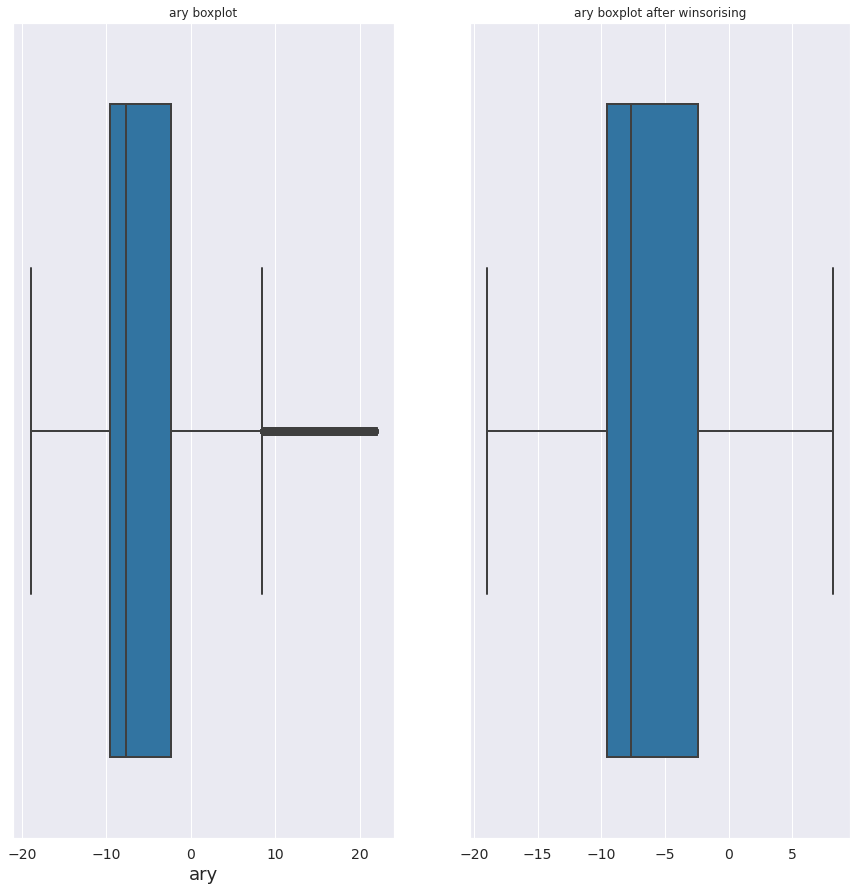

In [ ]:
#checking outlier for ary
fig, ax = plt.subplots(figsize=(15,15))
ary_data = train_pdf.ary
plt.subplot(1,2,1)
plt.title("ary boxplot")
sns.boxplot(ary_data)
winsorized_ary = winsorising(ary_data, [0,0.03]) #I found the limit value by test and try
plt.subplot(1,2,2)
plt.title("ary boxplot after winsorising")
sns.boxplot(winsorized_ary)
train_pdf.ary = winsorized_ary

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


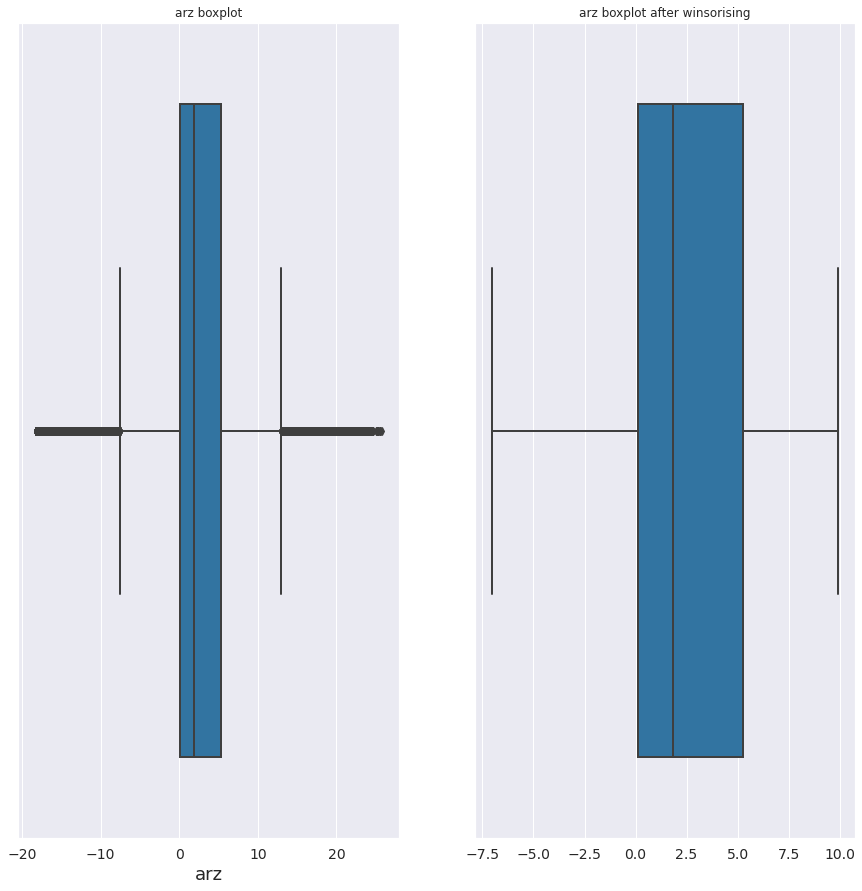

In [ ]:
#checking outlier for arz
fig, ax = plt.subplots(figsize=(15,15))
arz_data = train_pdf.arz
plt.subplot(1,2,1)
plt.title("arz boxplot")
sns.boxplot(arz_data)
winsorized_arz = winsorising(arz_data, 0.02) #I found the limit value by test and try
plt.subplot(1,2,2)
plt.title("arz boxplot after winsorising")
sns.boxplot(winsorized_arz)
train_pdf.arz = winsorized_arz

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


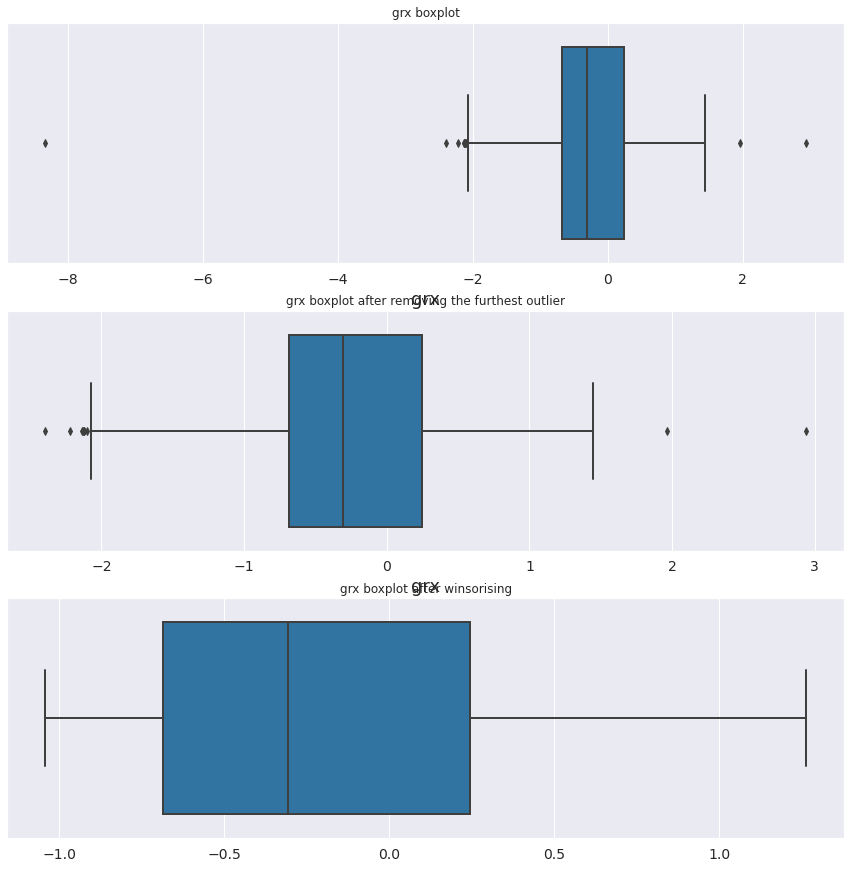

In [ ]:
#checking outlier for grx
fig, ax = plt.subplots(figsize=(15,15))
grx_data = train_pdf.grx
plt.subplot(3,1,1)
plt.title("grx boxplot")
sns.boxplot(grx_data)
#remove one of the datapoints which is more far from the others. Consider it as a noise
train_pdf = train_pdf.drop(train_pdf[train_pdf.grx < -4].index)
plt.subplot(3,1,2)
plt.title("grx boxplot after removing the furthest outlier")
sns.boxplot(train_pdf.grx)
winsorized_grx = winsorising(train_pdf.grx, 0.005) #I found the limit value by test and try
plt.subplot(3,1,3)
plt.title("grx boxplot after winsorising")
sns.boxplot(winsorized_grx)
train_pdf.grx = winsorized_grx

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


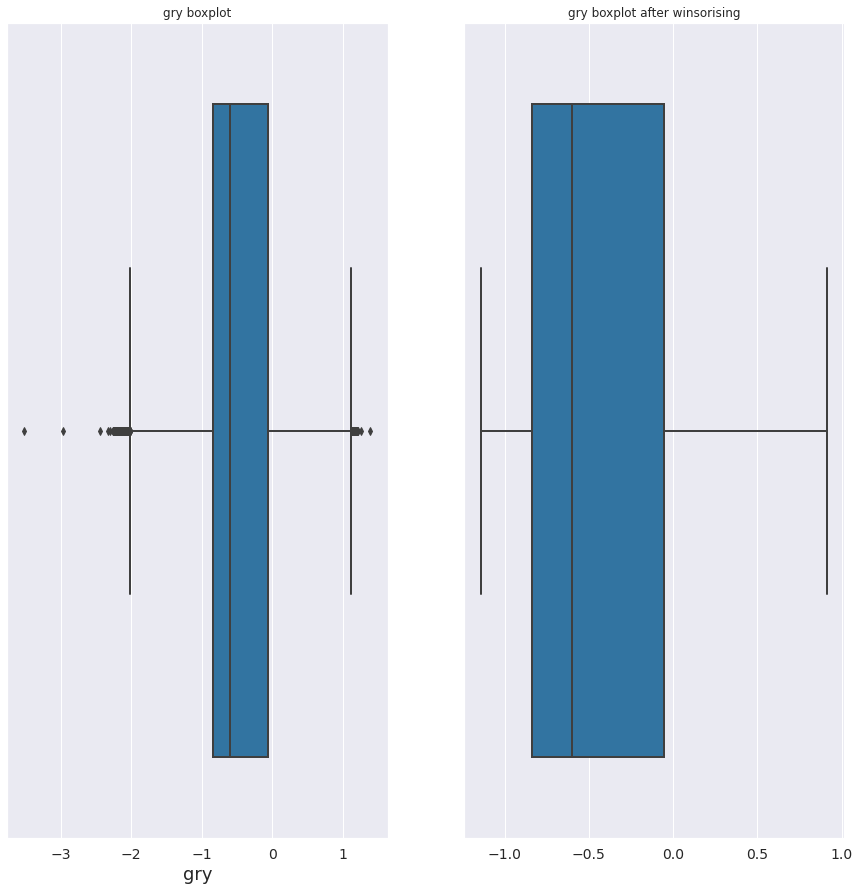

In [ ]:
#checking outlier for gry
fig, ax = plt.subplots(figsize=(15,15))
gry_data = train_pdf.gry
plt.subplot(1,2,1)
plt.title("gry boxplot")
sns.boxplot(gry_data)
winsorized_gry = winsorising(gry_data, 0.01) #I found the limit value by test and try
plt.subplot(1,2,2)
plt.title("gry boxplot after winsorising")
sns.boxplot(winsorized_gry)
train_pdf.gry = winsorized_gry

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


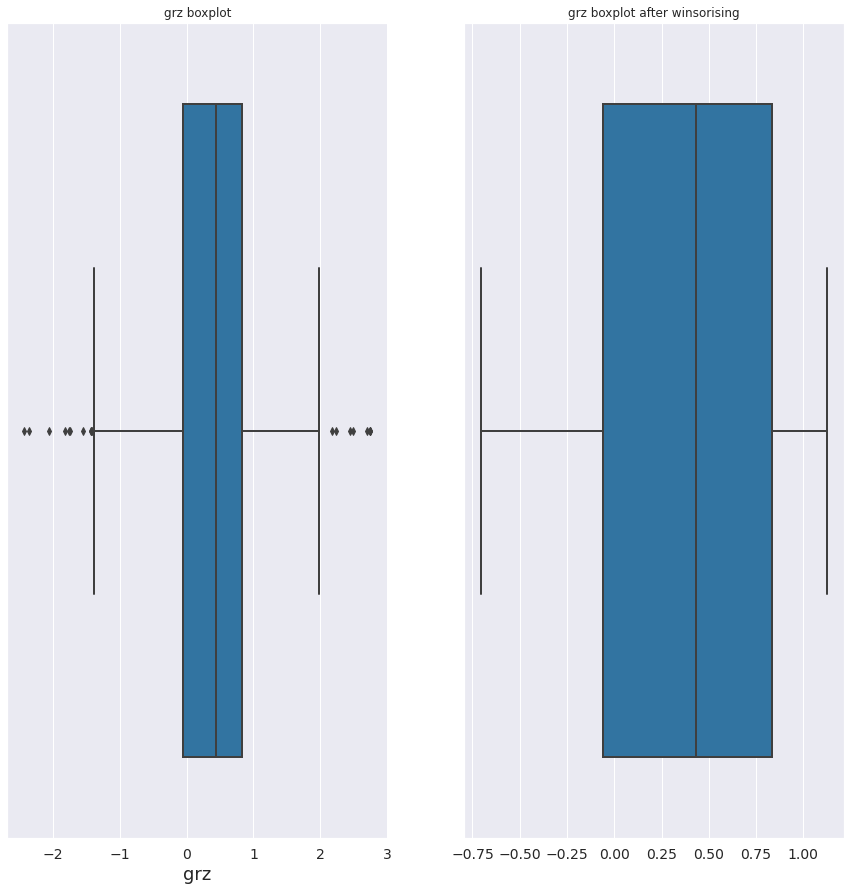

In [ ]:
#checking outlier for grz
fig, ax = plt.subplots(figsize=(15,15))
grz_data = train_pdf.grz
plt.subplot(1,2,1)
plt.title("grz boxplot")
sns.boxplot(grz_data)
winsorized_grz = winsorising(grz_data, 0.01) #I found the limit value by test and try
plt.subplot(1,2,2)
plt.title("grz boxplot after winsorising")
sns.boxplot(winsorized_grz)
train_pdf.grz = winsorized_grz

## <font color = darkblue>**Check for outliers after winsorising**<font>

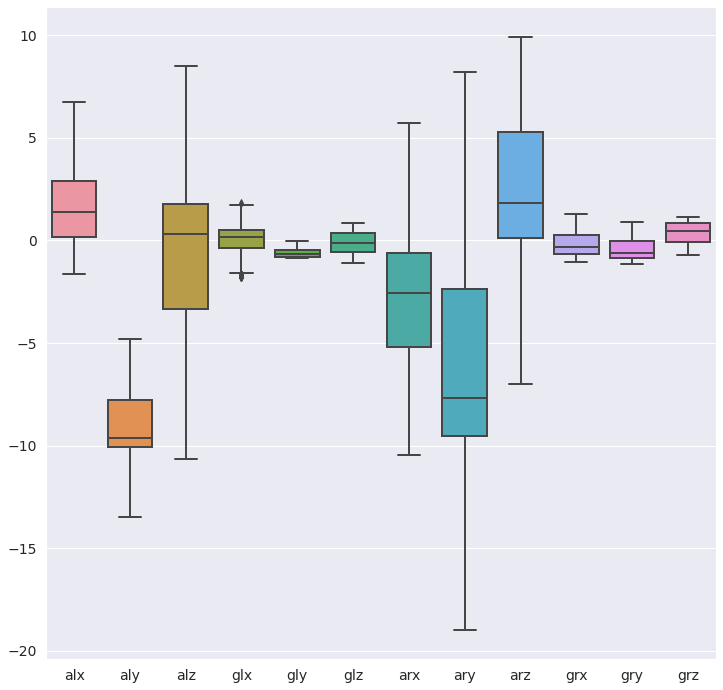

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
Features = train_pdf.drop(['Activity'], axis = 1)
sns.boxplot(data = Features)

In [ ]:
train_df=spark.createDataFrame(train_pdf) 

## <font color=red>**Decision Tree**<font><a name = "dtw"></a>

In [ ]:
Features=["alx","aly","alz","glx","gly","glz","arx","ary","arz","grx","gry","grz"]
winsorizedt_cv_model = decision_tree_pipeline(train_df, Features, "Activity")

In [ ]:
for i, avg_accuracy in enumerate(winsorizedt_cv_model.avgMetrics):
    print("Avg. Accuracy computed across k-fold cross validation for model setting #{:d}: {:.2f}".format(i+1,avg_accuracy))

Avg. Accuracy computed across k-fold cross validation for model setting #1: 0.53
Avg. Accuracy computed across k-fold cross validation for model setting #2: 0.56
Avg. Accuracy computed across k-fold cross validation for model setting #3: 0.79
Avg. Accuracy computed across k-fold cross validation for model setting #4: 0.80
Avg. Accuracy computed across k-fold cross validation for model setting #5: 0.84
Avg. Accuracy computed across k-fold cross validation for model setting #6: 0.86
Avg. Accuracy computed across k-fold cross validation for model setting #7: 0.89
Avg. Accuracy computed across k-fold cross validation for model setting #8: 0.90
Avg. Accuracy computed across k-fold cross validation for model setting #9: 0.91
Avg. Accuracy computed across k-fold cross validation for model setting #10: 0.92


### <font color = darkblue>**Check for generalization of the best model using test set**<font><a name = "dtwgeneral"></a>
Now, I am going to use tes set to evaluate the trained model. I will use the best model from **k-fold cross validation to make predictions.**

In [ ]:
print("Best model according to k-fold cross validation: maxDept=[{:d}]; impurity=[{:s}]".
      format(winsorizedt_cv_model.bestModel.stages[-1].getMaxDepth(), 
             winsorizedt_cv_model.bestModel.stages[-1].getImpurity(),
             )
      )
print(winsorizedt_cv_model.bestModel.stages[-1])

Best model according to k-fold cross validation: maxDept=[20]; impurity=[entropy]
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_cb7e532034e0, depth=20, numNodes=22743, numClasses=13, numFeatures=12


Evaluate model performance on the **Test Set**

In [ ]:
# Make predictions on the test set 
winsorizedt_predictions = winsorizedt_cv_model.transform(test_df)

In [ ]:
print("***** Evalution metrics for best model feeding with Test Set *****")
evaluate_model(winsorizedt_predictions)

***** Evalution metrics for best model feeding with Test Set *****
Accuracy is:  0.93
Weighted Fscore is:  0.93
Weighted Recall is:  0.93
Weighted Precision is:  0.92


###<font color = purple>**Observation**
It can be concluded that winsorizing the outliers does not improve the performance of the decision tree.

## <font color=red>**Random Forest**<font><a name = "rfw"></a>

In [ ]:
# Random forest for maxDepth = 10, numTrees = 20
from pyspark.ml.feature import StringIndexer,VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
Features=["alx","aly","alz","glx","gly","glz","arx","ary","arz","grx","gry","grz"]
label_indexer = StringIndexer(inputCol = "Activity", outputCol = "label")   
assembler = VectorAssembler(inputCols = Features, outputCol="features")
rf = RandomForestClassifier(featuresCol = "features", labelCol = "label", impurity = "entropy", numTrees = 10, maxDepth = 20, seed = 42)
pipeline = Pipeline(stages=[label_indexer] + [assembler]+ [rf])

transformer = pipeline.fit(train_df)
transformed_data = transformer.transform(train_df)

Py4JJavaError: ignored

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 37776)
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/py4j/java_gateway.py", line 1207, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/py4j/java_gateway.py", line 1033, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.7/dist-packages/py4j/java_gateway.py", line 1212, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving
Traceback (most recent call last):
  File "/usr/lib/python3.7/socketserver.py", line 316, in _handle_request_noblock
    self.pr

In [ ]:
best_rf_predictions = transformer.transform(test_df)
print("***** Evalution metrics for RF with maxDepth = 20, numTrees= 10 feeding with Test Set *****")
evaluate_model(best_rf_predictions)

***** Evalution metrics for RF with maxDepth = 20, numTrees= 10 feeding with Test Set *****
Accuracy is:  0.96
Weighted Fscore is:  0.96
Weighted Recall is:  0.96
Weighted Precision is:  0.96


### <font color = darkblue>**Check for generalization of the best model using test set**<font><a name = "rfwgeneral"></a>
Now, I am going to use tes set to evaluate the trained model. I will use the best model from **k-fold cross validation to make predictions.**

In [ ]:
print("Best model according to k-fold cross validation: maxDept=[{:d}]".
      format(winsorizerf_cv_model.bestModel.stages[-1]._java_obj.getMaxDepth(), 
             )
      )
print(winsorizerf_cv_model.bestModel.stages[-1])

Best model according to k-fold cross validation: maxDept=[12]
RandomForestClassificationModel: uid=RandomForestClassifier_31e4103af124, numTrees=15, numClasses=13, numFeatures=12



Evaluate model performance on the **Test Set**

In [ ]:
# Make predictions on the test set (`cv_model` contains the best model according to the result of k-fold cross validation)
# `test_df` will follow exactly the same pipeline defined above, and already fit to `train_df`
winsorizedrf_predictions = winsorizerf_cv_model.transform(test_df)

In [ ]:
print("***** Evalution metrics for best model feeding with Test Set *****")
evaluate_model(winsorizedrf_predictions)

***** Evalution metrics for best model feeding with Test Set *****
Accuracy is:  0.91
Weighted Fscore is:  0.9
Weighted Recall is:  0.91
Weighted Precision is:  0.91


###<font color = purple>**Observation**
It can be seen that accuracy on both train and test sets are not improved anymore. It means that the model is able to handle the outliers without winsorizing.

## <font color=red>**Multilayer Perceptron**<font><a name = "mlpw"></a>

In [ ]:
winsorizemlp_cv_model = Multilaye_Perceptron_pipeline(train_df, Features, "Activity")


In [ ]:
for i, avg_accuracy in enumerate(winsorizemlp_cv_model.avgMetrics):
    print("Avg. Accuracy computed across k-fold cross validation for model setting #{:d}: {:.2f}".format(i+1, avg_accuracy))

Avg. Accuracy computed across k-fold cross validation for model setting #1: 0.44
Avg. Accuracy computed across k-fold cross validation for model setting #2: 0.45
Avg. Accuracy computed across k-fold cross validation for model setting #3: 0.50
Avg. Accuracy computed across k-fold cross validation for model setting #4: 0.58


In [ ]:
print(" maxIter:", winsorizemlp_cv_model.bestModel.stages[-1].getMaxIter(),
      "Layers:", winsorizemlp_cv_model.bestModel.stages[-1].getLayers())

 maxIter: 100 Layers: [12, 8, 10, 6, 8, 13]


### <font color = darkblue>**Check for generalization of the best model using test set**<font><a name="mlpwingeneral"></a>
Now, I am going to use tes set to evaluate the trained model. I will use the best model from **k-fold cross validation to make predictions.**

In [ ]:
# Make predictions on the test set (`MLP_cv_model` contains the best model according to the result of k-fold cross validation)
winsorizedmlp_predictions = winsorizemlp_cv_model.transform(test_df)

Evaluate model performance on the **Test Set**

In [ ]:
print("***** Evalution metrics for best model feeding with Test Set *****")
evaluate_model(winsorizedmlp_predictions)

***** Evalution metrics for best model feeding with Test Set *****
Accuracy is:  0.62
Weighted Fscore is:  0.58
Weighted Recall is:  0.62
Weighted Precision is:  0.6


###<font color = purple>**Observation**
Winsorization dose not have an impressive effect on the performance of MLP.

##<font color = darkorange>**Summary of applying winsorization**<font><font><a name="winsum"></a>

## <font color=lightseagreen>**9. Conclusion**<font><a name ="con"></a>
---

In conclusion, I have applied 3 supervised learning algorithms (DT, RF, MLP). For tree based models (DT, RF) scaler was not used, but for MLP I checked the performance of the models with and without scaler, and I got a better result when I applied scaler.

In terms of the outliers, I trained models in two different ways:


*   Without considering the outlires
*   With applying winsorization

The overall results are shown in the table below:

<font color=darkblue>

 
                                                     *******Accuracy on the train set********** 

 Algorithms                          |    Accuracy| Accuracy (winsorazation)   
-------------------------------------|------------|--------------------------
Decision Tree (all features)         |  
Decision Tree (important features)   |
Random Forest (all features)         | 
Multilayer Perceptron(without scaler)|
Multilayer Perceptron(with scaler)   |

                                          *******Evaluation metrics on test set(no winsorization)********** 
Algorithm                            | Acc | W.Fscore|W.Recall|W.Precision
-------------------------------------|-----|---------|------- |----------
Decision Tree (all features)         |     |         |
Decision Tree (top 7 features)       |           
Random Forest (all features)         |
Random Forest (top 3 features)       | 
Multilayer Perceptron(without scaler)|
Multilayer Perceptron(with scaler)   |

                                           *******Evaluation metrics on test set(with winsorization********** 
Algorithm                            | Acc | W.Fscore|W.Recall|W.Precision
-------------------------------------|-----|---------|------- |----------
Decision Tree (all features)         |     |         |
Decision Tree (important features)   |           
Random Forest (all features)         | 
Multilayer Perceptron(without scaler)|
Multilayer Perceptron(with scaler)   |



>Therefore, the **best model** is **Random forest** with **top 3 features** and **without winsorizing**.
